# Data analysis with Python

In [32]:
import numpy as np
import pandas as pd
from scipy.stats import *
import matplotlib as mpl 

import seaborn as sns 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import mplcyberpunk
%matplotlib inline 

pd.set_option("display.max_columns", 00) 
pd.set_option("display.max_rows",100) 
plt.style.use("cyberpunk")

import warnings 
warnings.filterwarnings("ignore")

In [42]:
mpl.rcParams["font.style"] = "italic"
mpl.rcParams["font.weight"] = "bold"
mpl.rcParams["axes.linewidth"] = 1.5
mpl.rcParams["figure.dpi"] = 150
mpl.rcParams["axes.titlesize"] = 20
mpl.rcParams["axes.labelsize"] = 15
mpl.rcParams["axes.titleweight"] = "bold"
mpl.rcParams["axes.titlelocation"] = "left"
mpl.rcParams["axes.spines.top"] = False
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.labelweight"] = "bold"
mpl.rcParams["axes.labelpad"] = 8
mpl.rcParams["axes.titlepad"] = 25
mpl.rcParams['axes.labelcolor'] = "white"
mpl.rcParams['axes.edgecolor'] = "white"
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['xtick.color'] = "white"
mpl.rcParams['ytick.color'] = "white"
mpl.rcParams["boxplot.boxprops.color"] = "white"
mpl.rcParams["boxplot.whiskerprops.color"] = "white"
mpl.rcParams["boxplot.capprops.color"] = "white"
mpl.rcParams["boxplot.flierprops.markerfacecolor"] =  "white"


In [3]:
train = pd.read_csv("/storage/emulated/0/Sales_predict/train.csv") 
test = pd.read_csv("/storage/emulated/0/Sales_predict/test.csv") 

In [4]:
train.head() 

Item_ID  ...        Sales
0   FDU32  ...  2689.457781
1   NCT54  ...  3437.350375
2   FDW08  ...  3129.967268
3   FDJ22  ...  1306.514376
4   FDF47  ...  1739.769829

[5 rows x 9 columns]

In [16]:
pd.DataFrame({"Train/null":(train.isnull().sum()/train.shape[0])*100,
                 "Test/null": (test.isnull().sum()/test.shape[0])*100}) 

Train/null  Test/null
Item_ID                      0.0        0.0
Item_MRP                     0.0        0.0
Item_Type                    0.0        0.0
Item_W                       0.0        0.0
Outlet_ID                    0.0        0.0
Outlet_Location_Type         0.0        0.0
Outlet_Size                  0.0        0.0
Outlet_Year                  0.0        0.0
Sales                        0.0        NaN

In [4]:
train.duplicated().sum()

0

## Target

skew: 1.125448955321488
kurt: 1.307677667198071


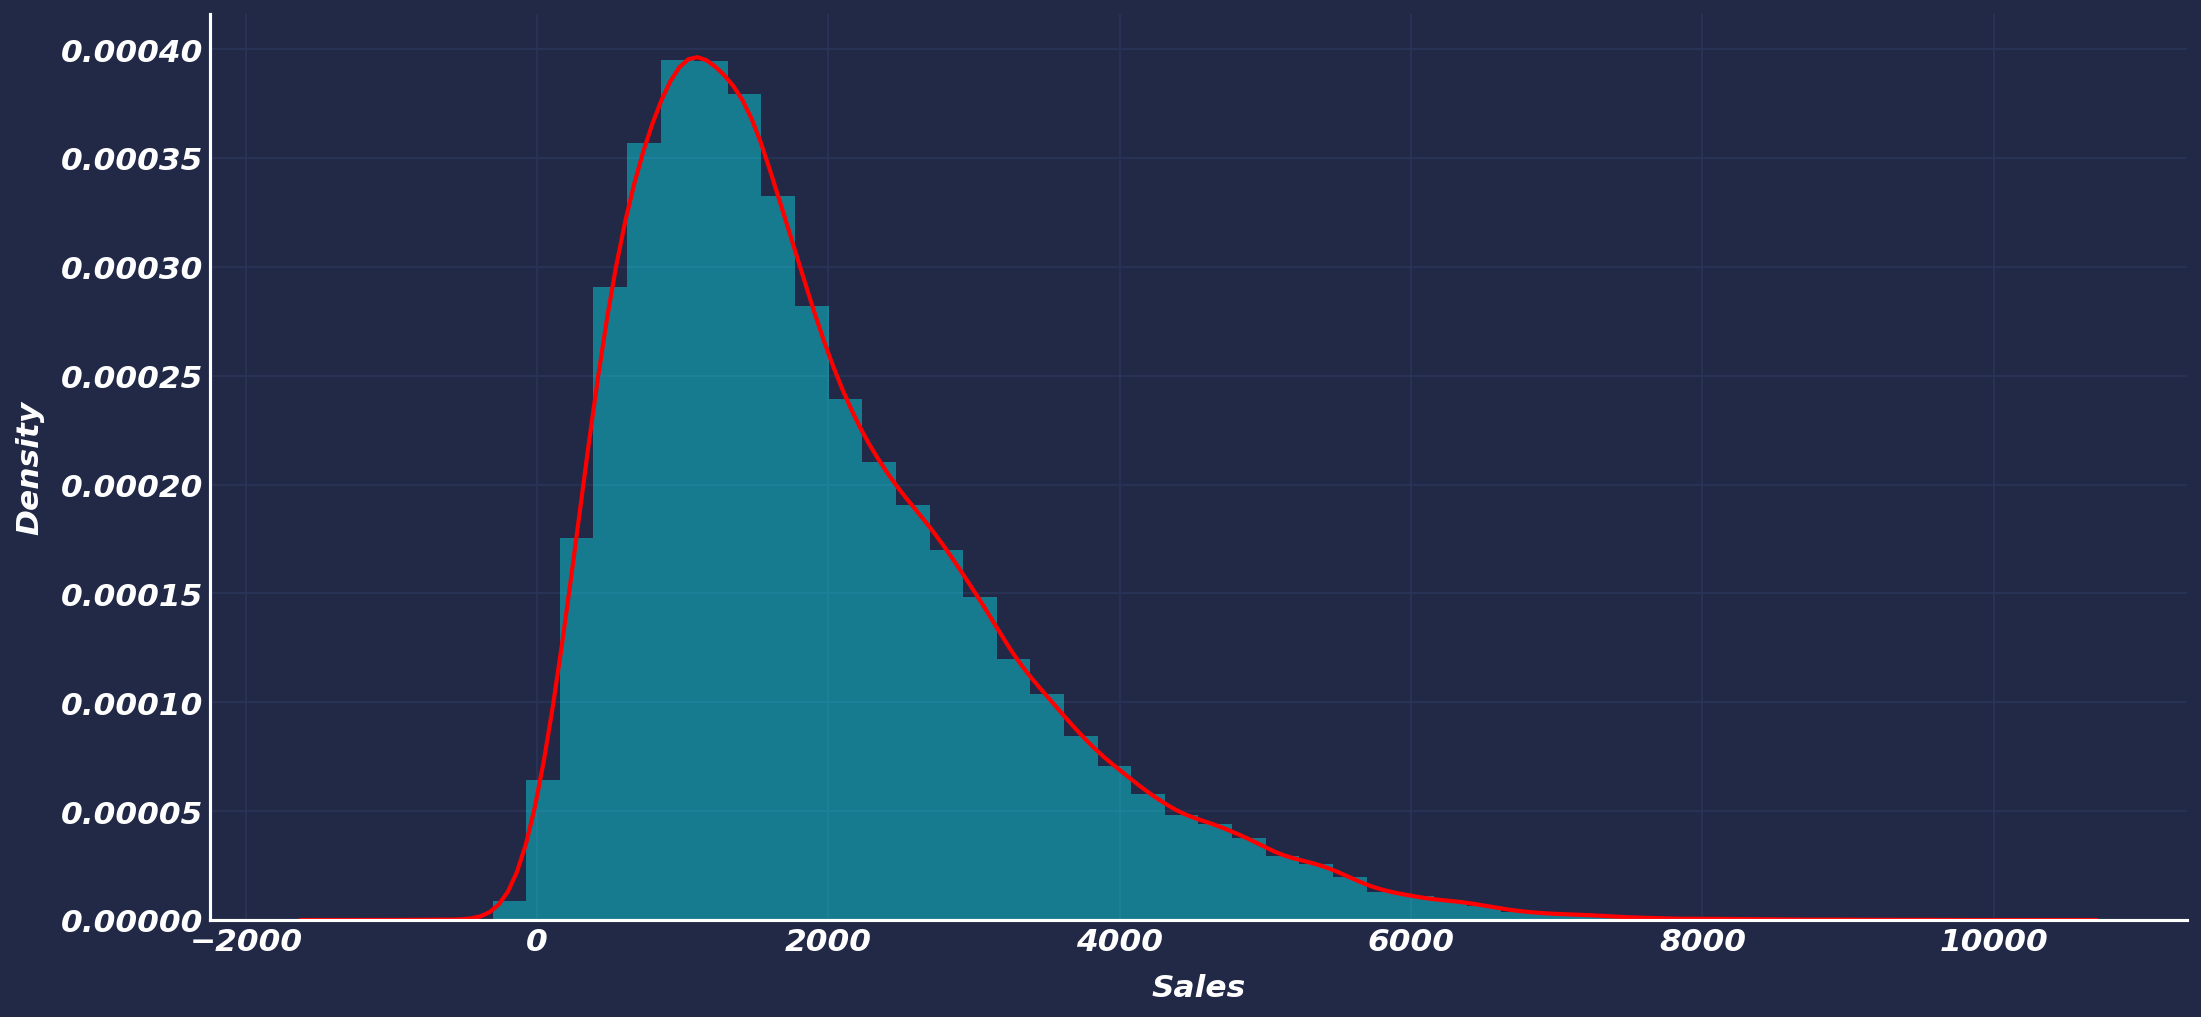

In [4]:
plt.figure(figsize=(17,8))

sns.distplot(train.Sales,kde_kws={"color":"red","linewidth":2}) 

print(f"skew: {train.Sales.skew()}") 
print(f"kurt: {train.Sales.kurt()}") 

In [6]:
train.Sales.describe()

count    87864.000000
mean      1911.842120
std       1291.386004
min      -1229.360345
25%        959.249675
50%       1606.307877
75%       2608.057736
max      10309.283310
Name: Sales, dtype: float64

In [5]:
# top 10 dari atas 

train.Sales.nlargest(10) 

65833    10309.283310
30428     9490.959165
13092     9457.092997
2847      9351.239250
29427     9226.330112
35128     9010.250492
53728     8998.232565
2830      8943.000308
34596     8863.711387
42651     8855.276169
Name: Sales, dtype: float64

In [6]:
# top 10 dari bawah 

train.Sales.nsmallest(10) 

67148   -1229.360345
1366     -859.248126
81472    -762.750511
32117    -669.891835
70728    -601.320050
34765    -524.043858
75314    -406.317406
51485    -392.899955
13245    -347.156654
16794    -332.122733
Name: Sales, dtype: float64

In [12]:
train.query("Sales < 0")

Item_ID  ...       Sales
102     FDI14  ...  -46.046126
133     FDZ52  ...  -25.433674
892     FDN12  ...   -4.505521
976     DRE48  ...   -2.610184
1179    FDA39  ...  -64.609374
...       ...  ...         ...
87527   FDC29  ... -195.344449
87637   FDS19  ...  -80.265162
87736   FDY25  ... -137.479746
87818   NCS30  ...   -1.162543
87857   NCC18  ... -230.043351

[397 rows x 9 columns]

In [5]:
bi = np.log(1 + train.Sales - train.Sales.min()) 

In [8]:
bi.describe() 

count    87864.000000
mean         7.975252
std          0.390662
min          0.000000
25%          7.691479
50%          7.950385
75%          8.252816
max          9.353544
Name: Sales, dtype: float64

In [ ]:
# pisahkan data type

In [9]:
cater = train.select_dtypes("object").columns
number = train.select_dtypes("number").drop("Sales",axis=1).columns

## categorical features

In [18]:
train[cater].describe() 

Item_ID  ... Outlet_Location_Type
count    87864  ...                87864
unique     895  ...                    3
top      FDE11  ...               Tier 1
freq       419  ...                33567

[4 rows x 5 columns]

In [ ]:
#item id 

In [19]:
train.Item_ID.value_counts()

FDE11    419
NCE07    362
NCL18    346
NCO06    336
FDD51    329
        ... 
DRF60      2
FDI12      2
FDM15      2
FDA22      1
NCM19      1
Name: Item_ID, Length: 895, dtype: int64

In [20]:
# check unique values
train.Item_ID.unique()

array(['FDU32', 'NCT54', 'FDW08', 'FDJ22', 'FDF47', 'DRK12', 'FDA32',
       'FDH24', 'FDW03', 'FDE11', 'FDQ40', 'FDF56', 'FDC58', 'FDG32',
       'FDS55', 'FDN46', 'NCY17', 'FDP40', 'FDS35', 'FDY40', 'DRL01',
       'FDY27', 'FDW28', 'FDX09', 'NCI54', 'FDR34', 'FDF08', 'NCK05',
       'FDG21', 'FDT34', 'DRI47', 'FDQ21', 'FDO32', 'FDJ04', 'NCT41',
       'FDM08', 'FDN21', 'FDQ31', 'FDS04', 'FDS34', 'FDK60', 'FDZ49',
       'FDA43', 'DRJ51', 'NCL05', 'NCA17', 'FDL38', 'FDS16', 'FDC41',
       'FDU55', 'DRF25', 'NCB31', 'FDO09', 'FDP25', 'FDE14', 'NCG42',
       'FDD40', 'FDX36', 'FDU12', 'FDM04', 'FDV26', 'FDL50', 'FDJ60',
       'DRF01', 'FDE41', 'FDW52', 'NCL31', 'FDC35', 'FDZ45', 'FDZ58',
       'DRD25', 'FDS49', 'FDQ23', 'NCW54', 'FDI19', 'FDX23', 'FDL25',
       'DRL11', 'FDX45', 'FDP52', 'FDD21', 'NCO41', 'NCJ54', 'NCP17',
       'FDR35', 'FDP16', 'FDI07', 'FDL44', 'FDH60', 'FDV55', 'FDD52',
       'DRK49', 'FDI15', 'FDR26', 'DRN47', 'DRF49', 'FDI14', 'FDB23',
       'FDW48', 'NCR

In [11]:
item = train.Item_ID.apply(lambda x: str(x)[:3])

In [13]:
# split 3 item
item.value_counts()

FDX    3426
FDY    3131
FDZ    3105
FDS    3101
FDD    2983
FDA    2930
FDV    2800
FDW    2747
FDR    2677
FDO    2636
FDI    2599
FDL    2555
FDH    2492
FDC    2449
FDT    2434
FDP    2412
FDU    2319
FDB    2315
FDN    2308
FDQ    2195
FDM    2052
FDF    1897
FDG    1780
FDJ    1621
FDE    1339
FDK    1331
NCO    1293
NCC    1163
DRF    1123
NCN    1120
NCJ    1119
DRK     981
NCA     954
NCE     907
NCL     899
NCM     860
NCP     842
NCR     826
DRL     727
NCT     647
DRJ     641
NCS     640
DRM     615
NCZ     605
NCB     598
NCI     529
DRH     502
DRI     496
NCY     493
NCG     463
DRG     461
NCK     438
NCX     400
DRE     388
DRD     372
NCV     355
NCU     349
NCW     327
NCF     321
NCH     311
DRN     260
DRC     223
DRA     195
NCQ     181
DRB     175
DRO     156
DRZ     118
DRQ      84
DRP      58
NCD      15
Name: Item_ID, dtype: int64

In [34]:
# split 3 item 
# rata² Sales dari item 

train.groupby(item)["Sales"].mean().to_frame().sort_values("Sales",ascending=False).style.bar(subset="Sales", color="red") 

In [36]:
# split 2 item
item.value_counts() 

FD    63634
NC    16655
DR     7575
Name: Item_ID, dtype: int64

In [38]:
# split 2 item 
# rata² Sales dari item 

train.groupby(item)["Sales"].mean().to_frame().sort_values("Sales",ascending=False).style.bar(subset="Sales", color="red") 

In [10]:
# extract 3 item 

for i in [train,test]:
    i["Item"] = i.Item_ID.apply(lambda x: str(x)[:3]) 

In [37]:
train.Item.describe()

count     87864
unique       70
top         FDX
freq       3426
Name: Item, dtype: object

In [12]:
# id 
Id = train.Item_ID.apply(lambda x: str(x)[3:])

In [33]:
Id.value_counts().sort_index()

01    1228
02    1025
03    1557
04    1790
05    1966
06    1351
07    2293
08    1910
09    1200
10    1103
11    1782
12    1521
13    1353
14    1151
15    1094
16    1377
17    1606
18    2220
19    1742
20     921
21    2502
22     988
23    1894
24     978
25    1933
26    1508
27    1670
28    1121
29    1584
30    1648
31    1670
32    1462
33    1375
34    1804
35    1058
36     892
37    1182
38    1104
39    1607
40    1096
41    1288
42    1123
43    1384
44    1491
45    2107
46    1491
47    1928
48     960
49    1555
50    1394
51    1482
52    1802
53    1133
54    1579
55     595
56    1113
57    1845
58    1887
59    1401
60    1040
Name: Item_ID, dtype: int64

Text(0.0, 1.0, 'Id')

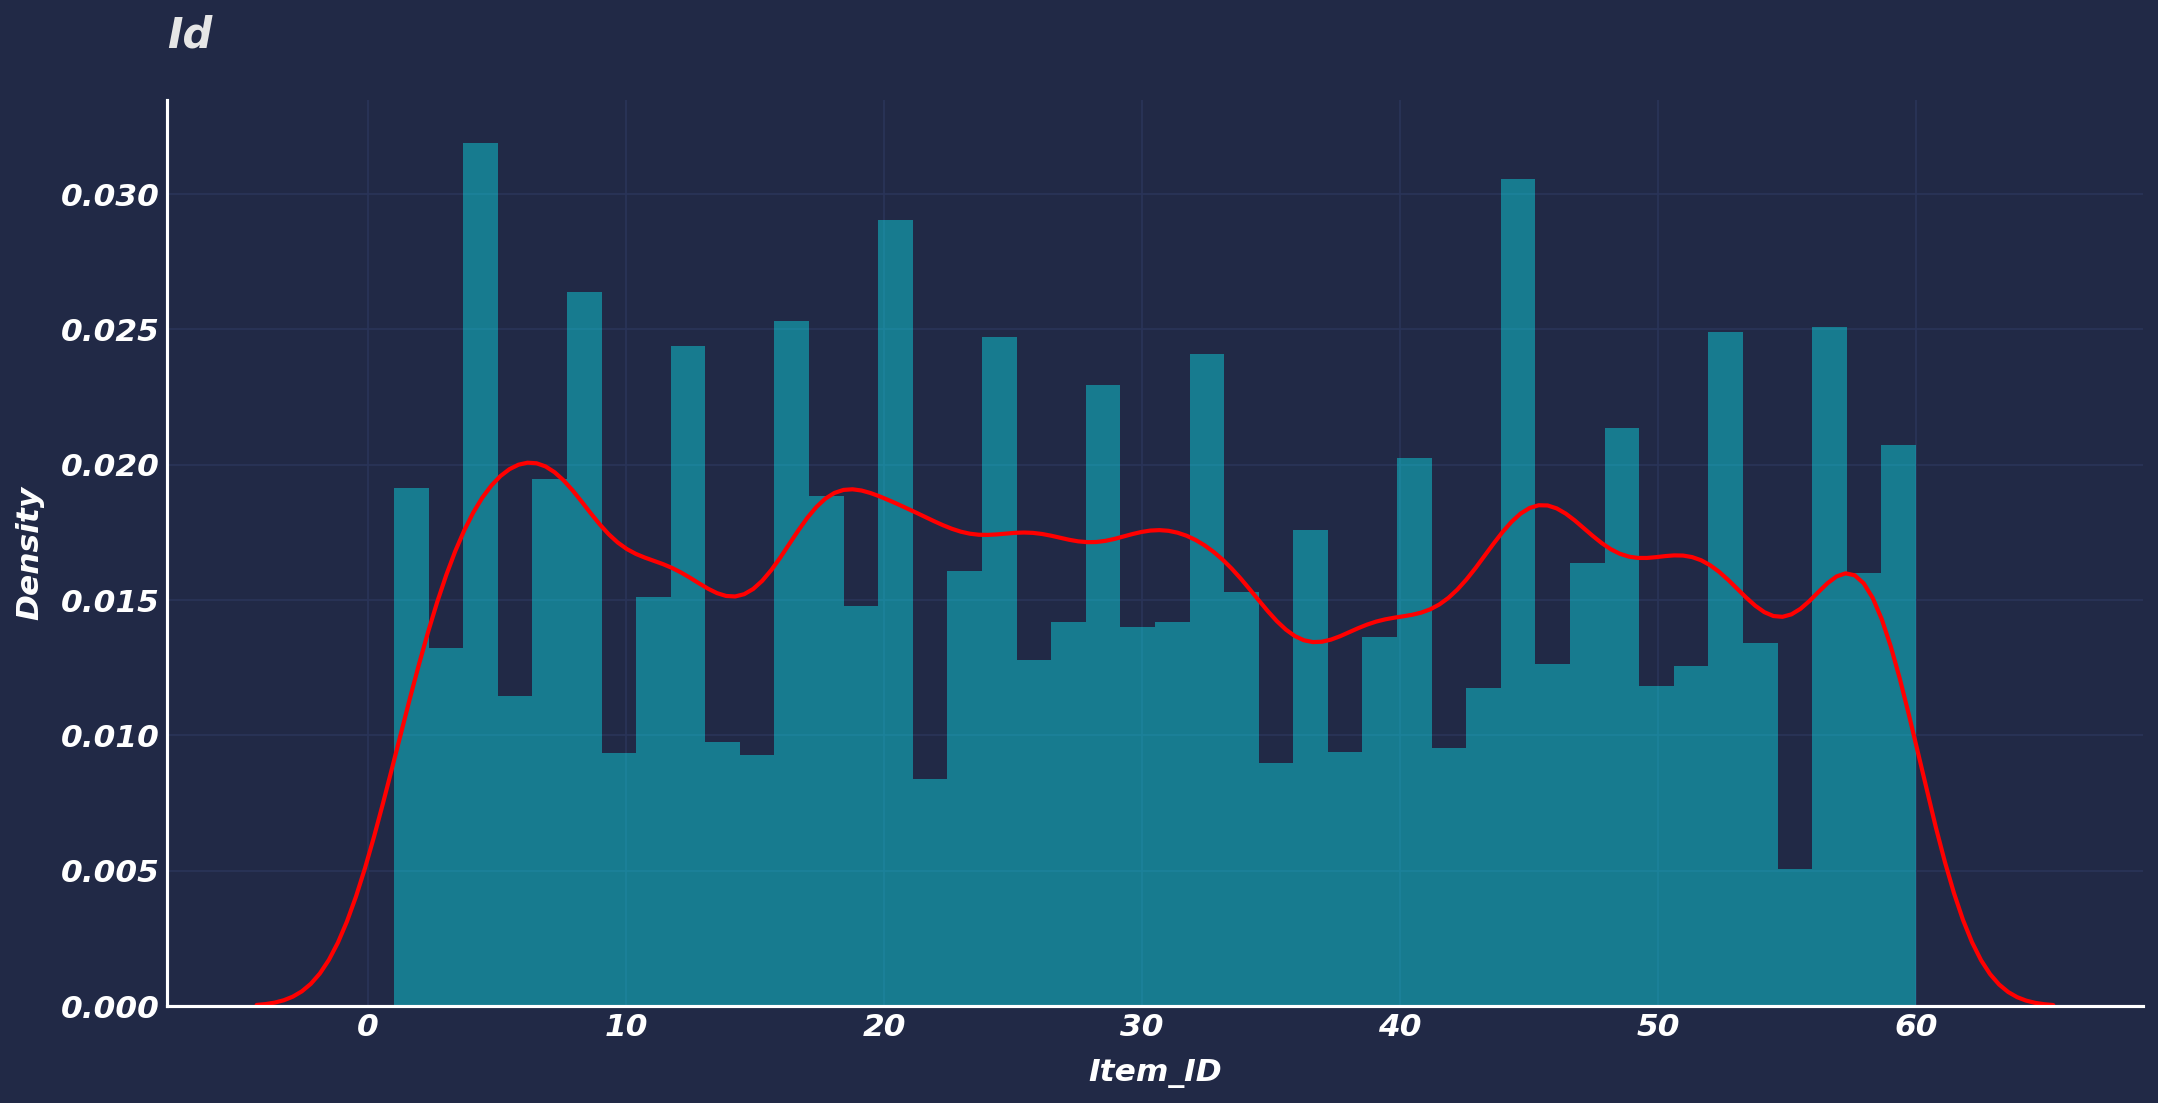

In [16]:
plt.figure(figsize=(17,8))

sns.distplot(Id.astype("int"),kde_kws={"color":"red","linewidth":2}) 
plt.title("Id") 

In [34]:
# id
# rata² Sales dari id

train.groupby(Id)["Sales"].mean().to_frame().sort_values("Sales",ascending=False).style.bar(subset="Sales", color="red") 

Text(0.0, 1.0, 'correlation id & sales')

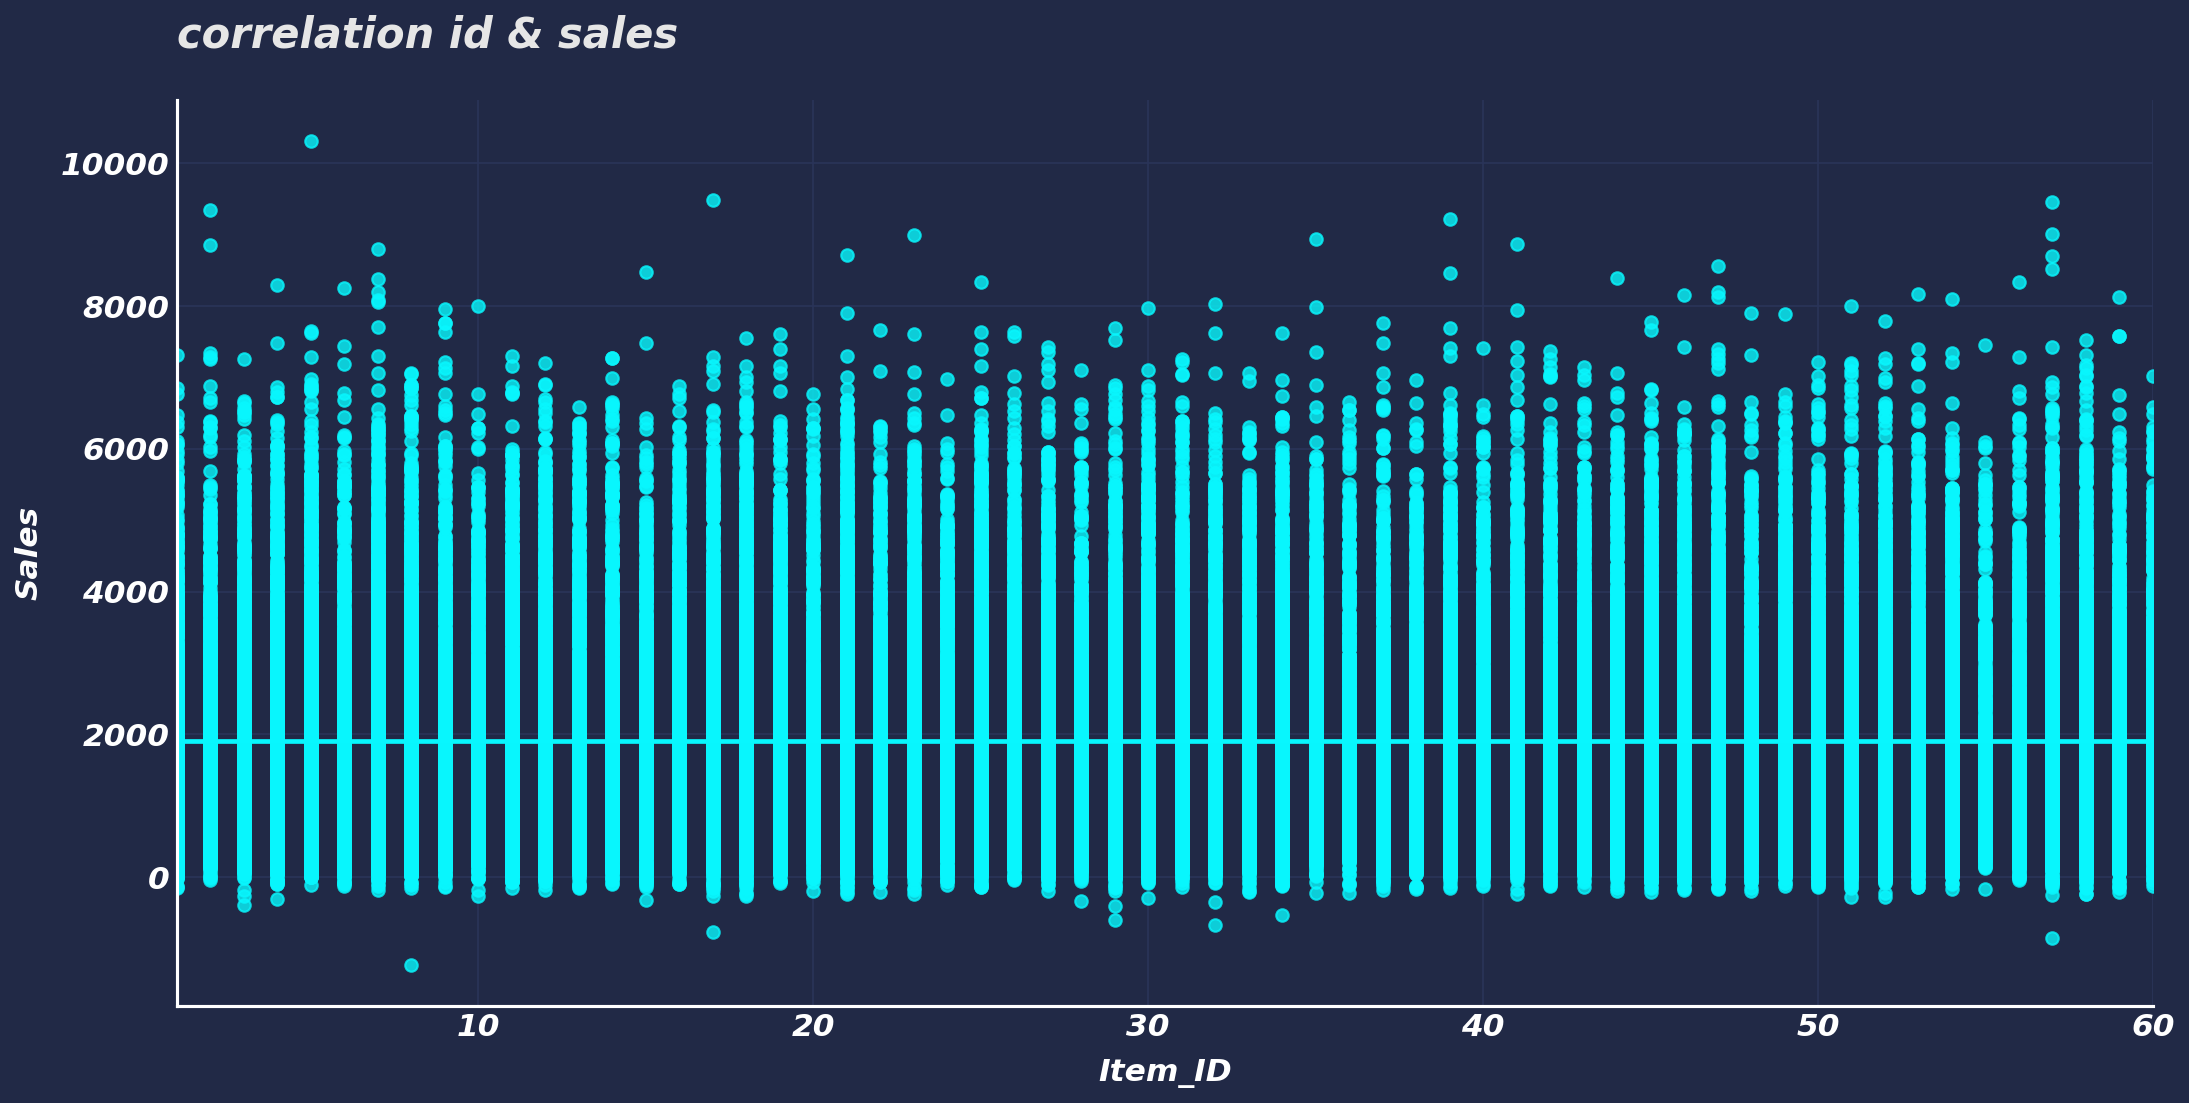

In [36]:
# check correlation
plt.figure(figsize=(17,8))

sns.regplot(x=Id.astype("int"), y=train.Sales) 
plt.title("correlation id & sales") 

In [11]:
# extract id 

for i in [train,test]:
    i["ID"] = i.Item_ID.apply(lambda x: str(x)[3:]).astype("int") 

In [48]:
i.ID.describe()

count    37656.000000
mean        29.892341
std         17.276851
min          1.000000
25%         15.000000
50%         29.000000
75%         45.000000
max         60.000000
Name: ID, dtype: float64

In [ ]:
# item type

In [50]:
train.Item_Type.value_counts().to_frame() 

Item_Type
Baking Goods               14666
Fruits and Vegetables      14328
Meat                        8099
Snack Foods                 7817
Household                   6018
Soft Drinks                 5396
Frozen Foods                5129
Canned                      4565
Dairy                       3807
Others                      3688
Breads                      3509
Hard Drinks                 3129
Health and Hygiene          2995
Starchy Foods               2974
Seafood                     1107
Breakfast                    637

Text(0, 0.5, 'Item_Type')

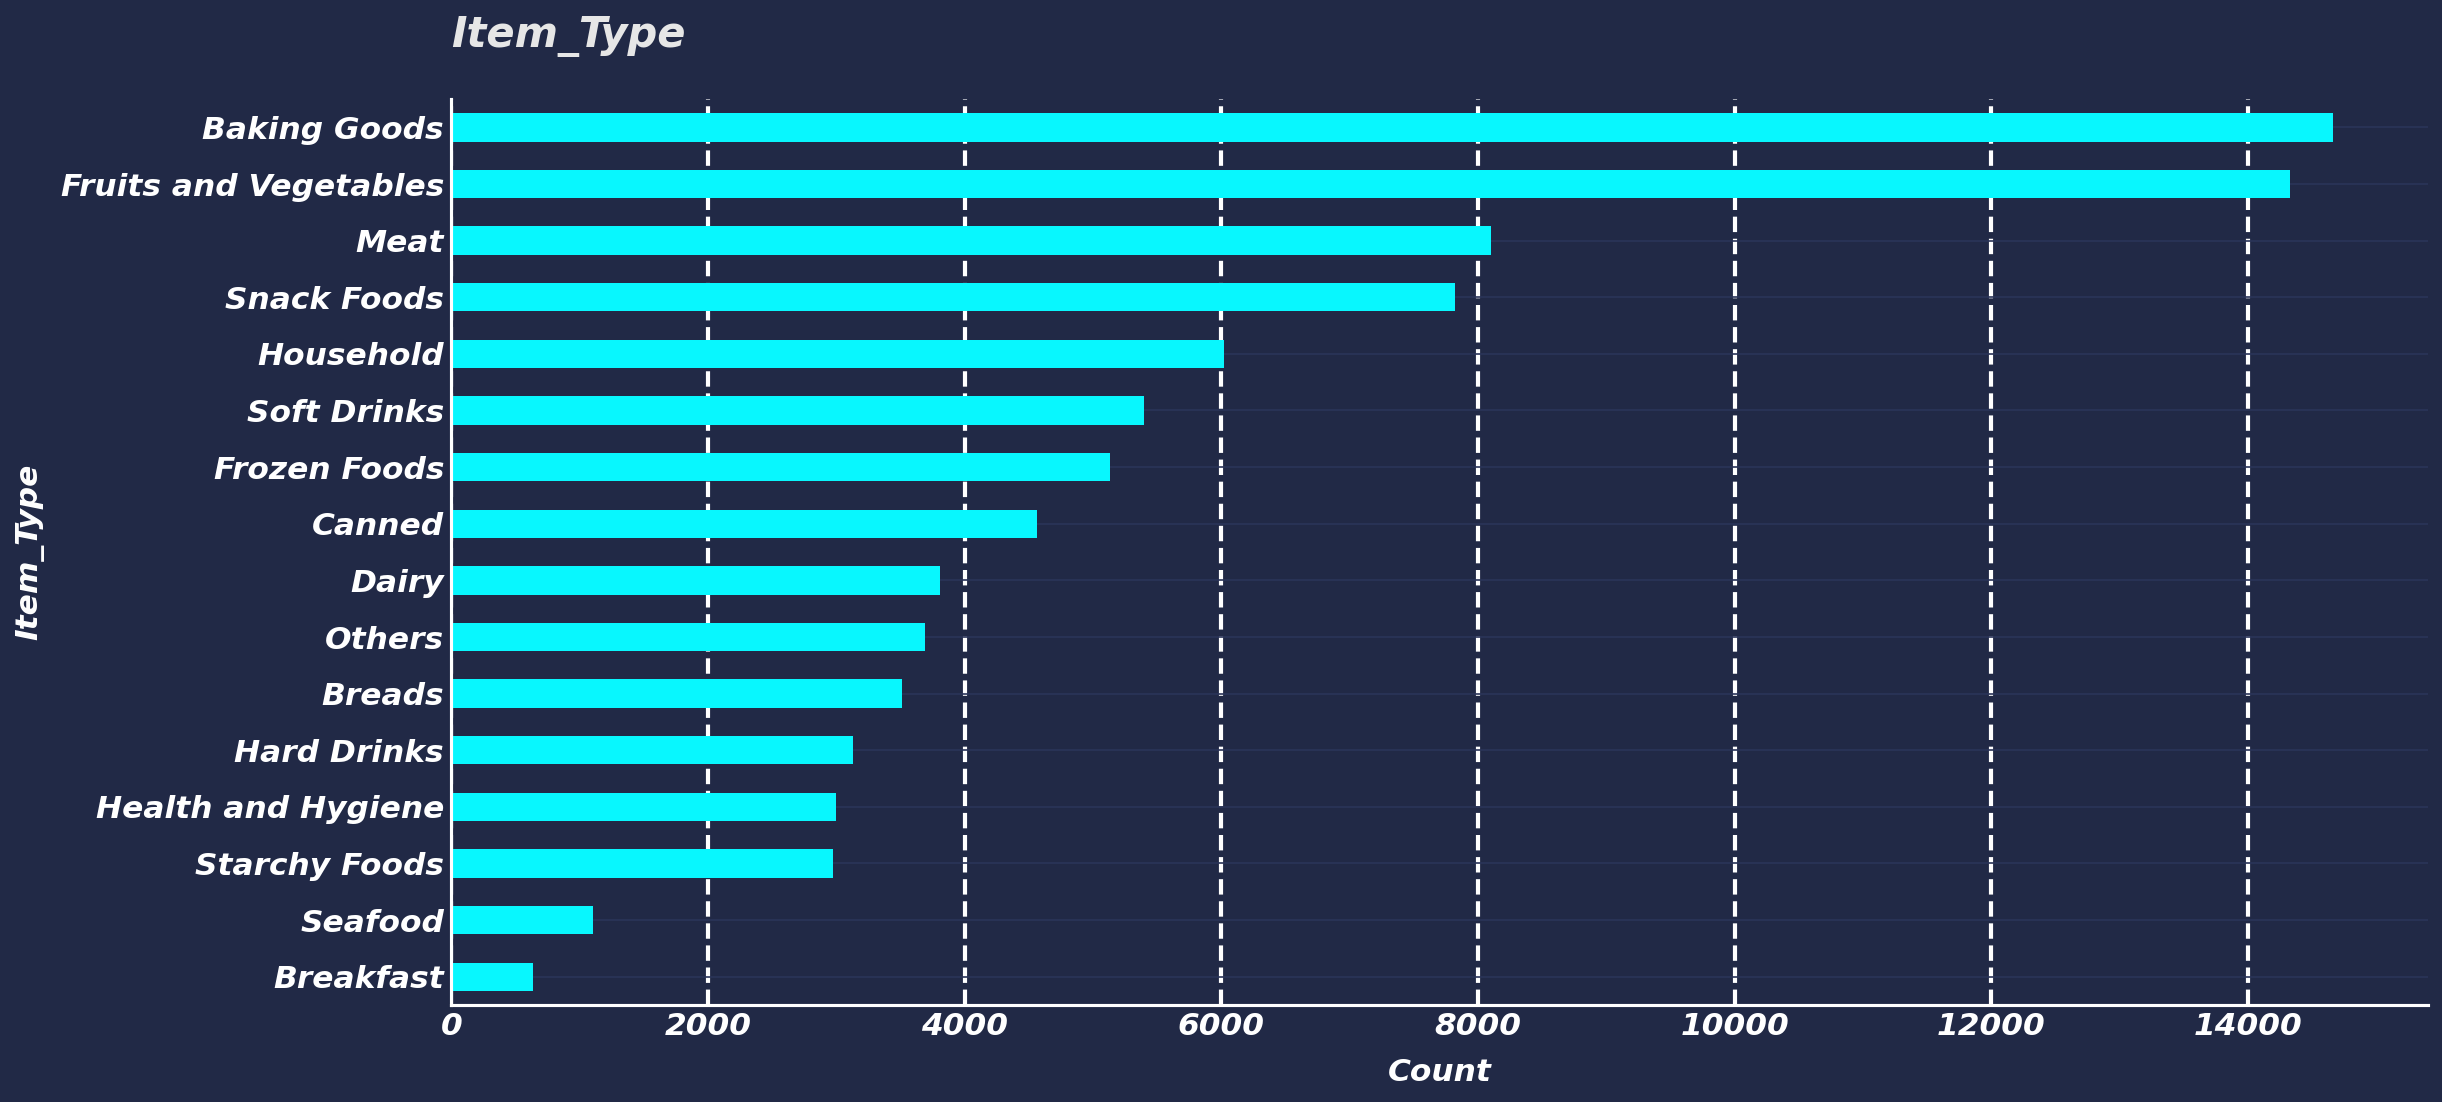

In [54]:
# plot item type

train.Item_Type.value_counts().sort_values().plot(kind="barh", figsize=(17, 8)) 
plt.grid(axis="x", linewidth=2, linestyle="--", color="white") 

plt.title("Item_Type")
plt.xlabel("Count")
plt.ylabel("Item_Type")

In [51]:
#  item type
# rata² Sales dari item type

train.groupby("Item_Type")["Sales"].mean().to_frame().sort_values("Sales",ascending=False).style.bar(subset="Sales", color="red") 

In [12]:
# ubah nilai item type 

item = {"Seafood": "Foods", 
        "Starchy Foods": "Foods", 
        "Frozen Foods": "Foods", 
        "Snack Foods": "Foods", 
        "Hard Drinks": "Drinks", 
        "Soft Drinks": "Drinks"}

In [11]:
new_item = train.Item_Type.replace(item)

In [57]:
# setelah mengubah nilai 

new_item.value_counts().to_frame() 

Item_Type
Foods                      17027
Baking Goods               14666
Fruits and Vegetables      14328
Drinks                      8525
Meat                        8099
Household                   6018
Canned                      4565
Dairy                       3807
Others                      3688
Breads                      3509
Health and Hygiene          2995
Breakfast                    637

In [58]:
#  item type
# rata² Sales dari item type

train.groupby(new_item)["Sales"].mean().to_frame().sort_values("Sales",ascending=False).style.bar(subset="Sales", color="red") 

In [60]:
new_item.describe()

count     87864
unique       12
top       Foods
freq      17027
Name: Item_Type, dtype: object

In [13]:
for i in [train,test]:
    i["Item_Type"] = i.Item_Type.replace(item) 

In [ ]:
# outlet id 


In [63]:
train.Outlet_ID.value_counts()

OUT035    24071
OUT046    20850
OUT018    17156
OUT049    13356
OUT013    12431
Name: Outlet_ID, dtype: int64

Text(0, 0.5, 'Outlet ID')

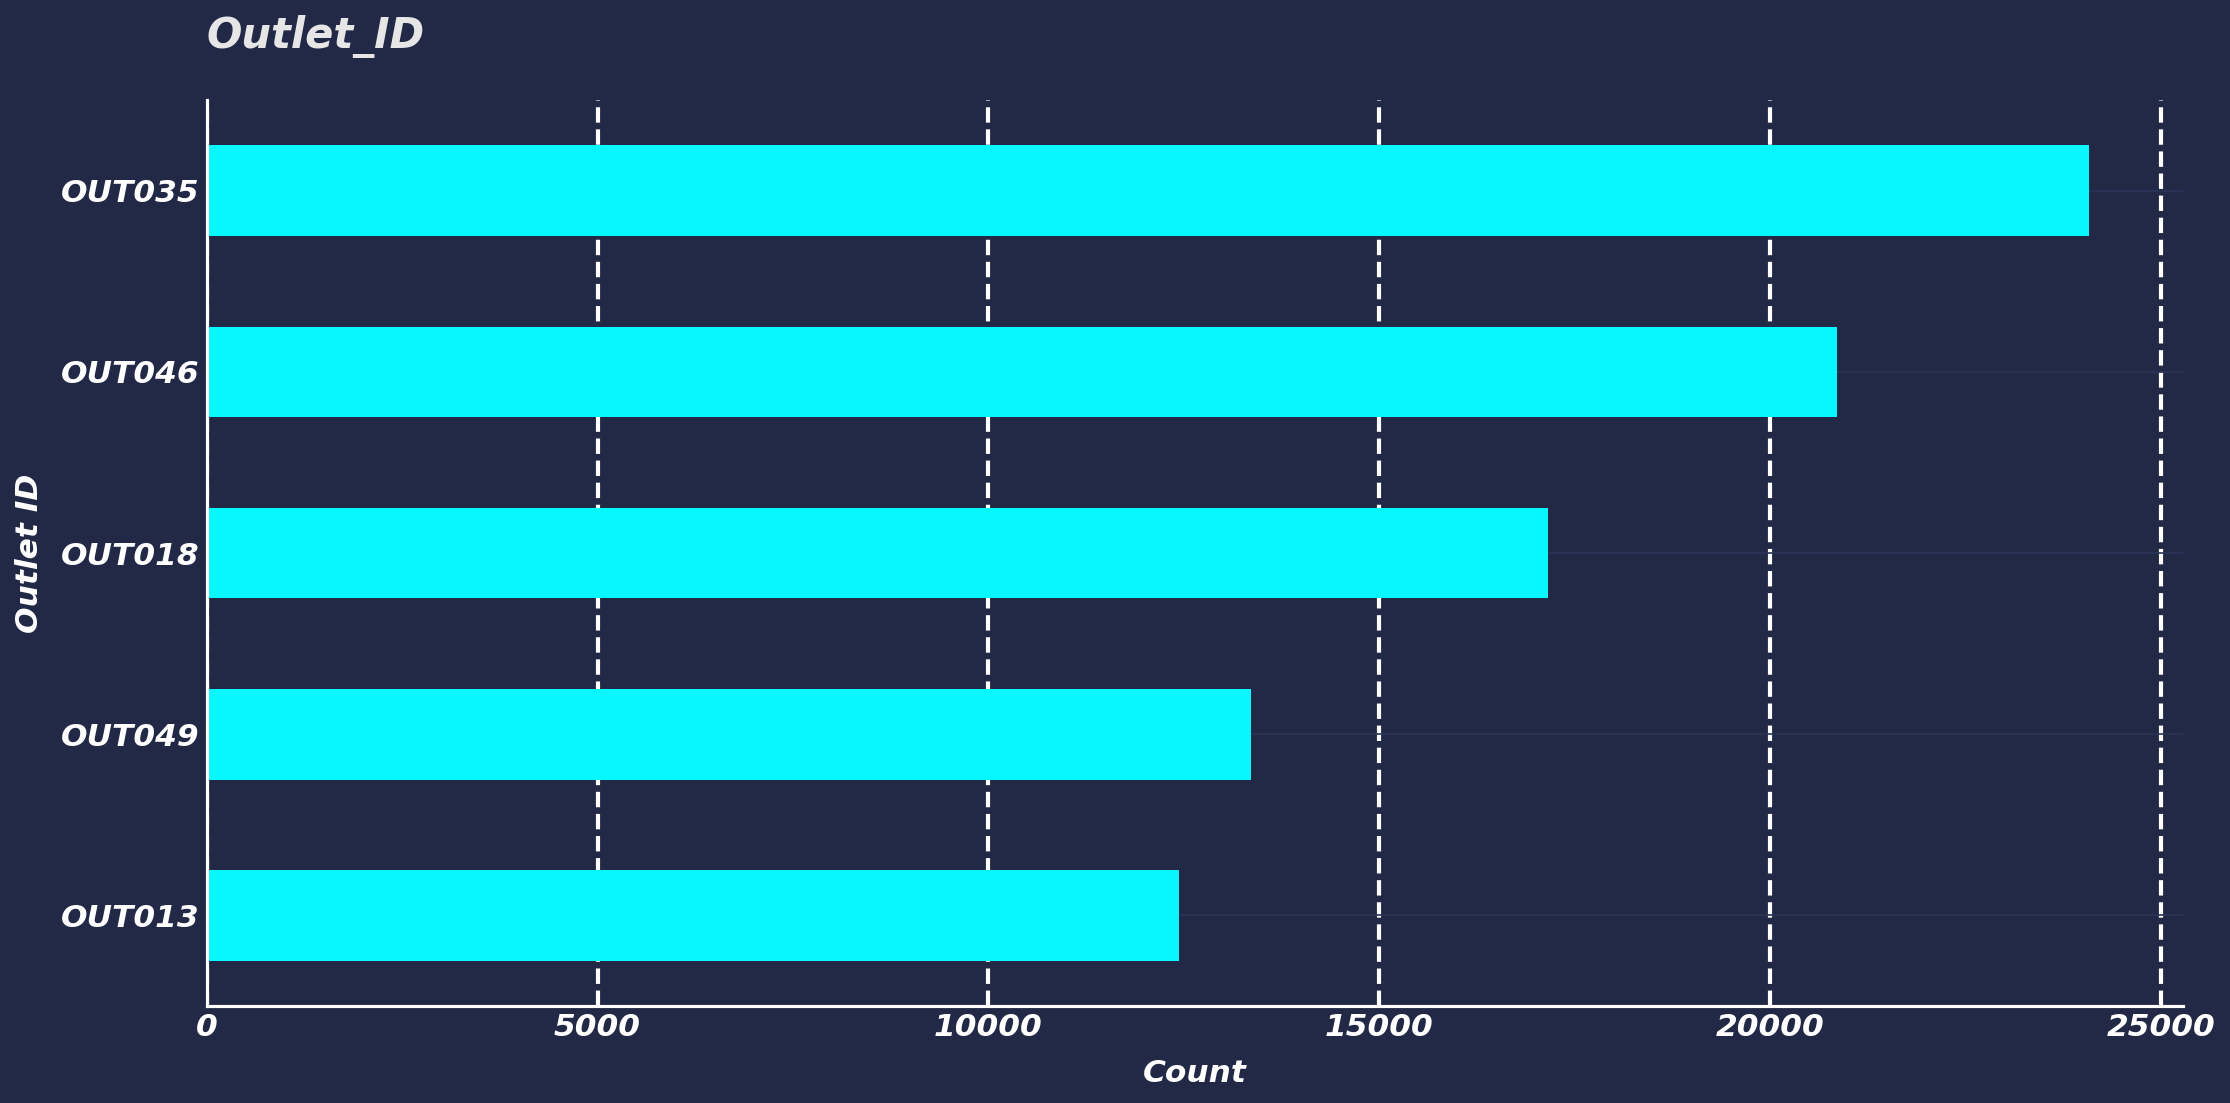

In [72]:
# plot Outlet ID

train.Outlet_ID.value_counts().sort_values().plot(kind="barh", figsize=(17, 8)) 
plt.grid(axis="x", linewidth=2, linestyle="--", color="white") 

plt.title("Outlet_ID")
plt.xlabel("Count")
plt.ylabel("Outlet ID")

In [66]:
#  outlet id
# rata² Sales dari Outlet id

train.groupby("Outlet_ID")["Sales"].mean().to_frame().sort_values("Sales",ascending=False).style.bar(subset="Sales", color="red") 

Text(0, 0.5, 'Sales')

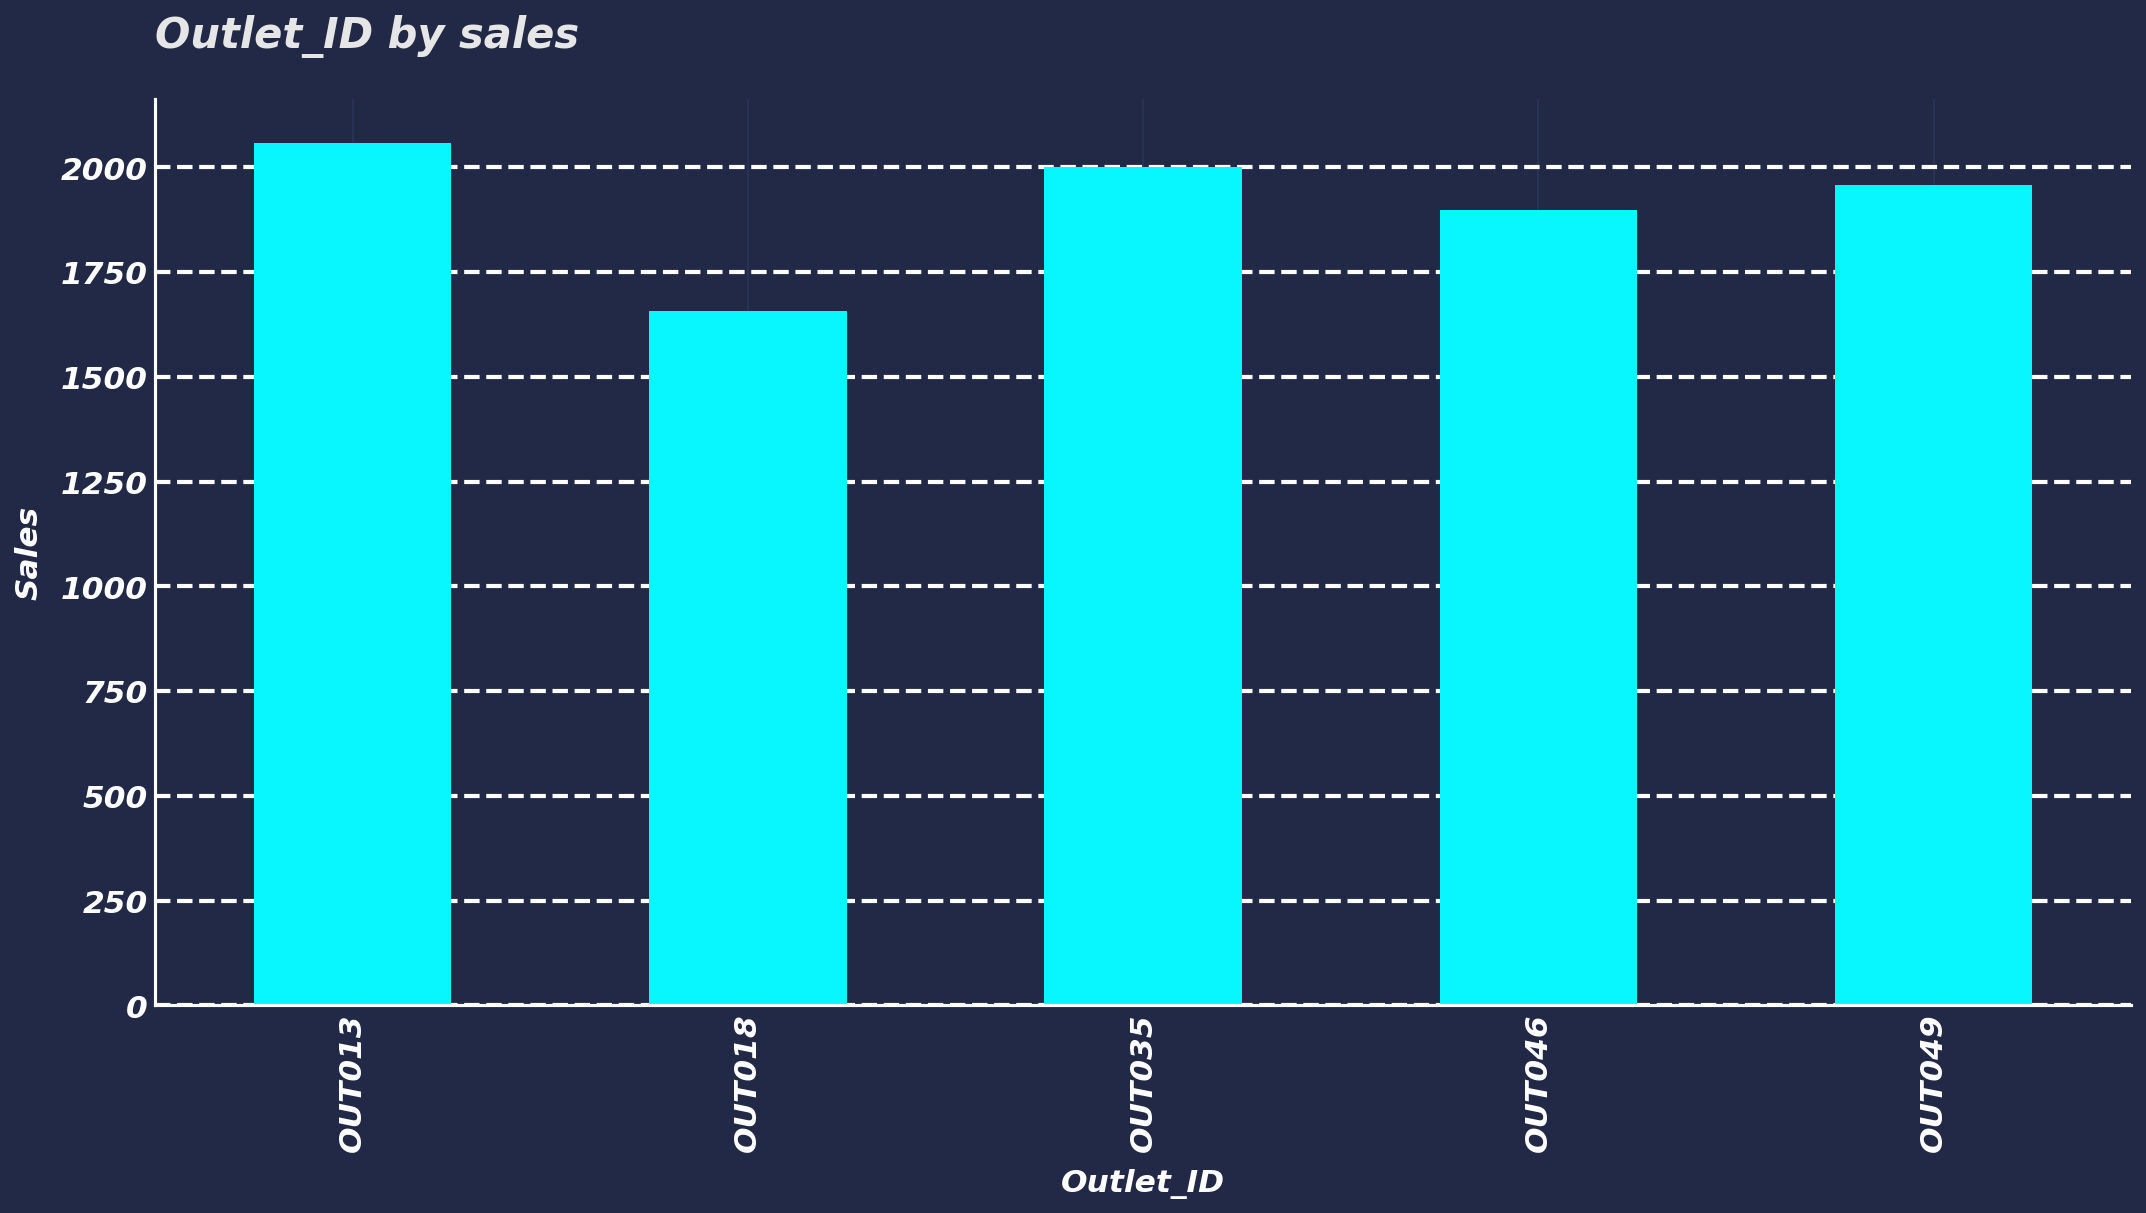

In [24]:
# plot Outlet ID

train.groupby("Outlet_ID")["Sales"].mean().plot(kind="bar", figsize=(17, 8)) 
plt.grid(axis="y", linewidth=2, linestyle="--", color="white") 

plt.title("Outlet_ID by sales")
plt.xlabel("Outlet_ID")
plt.ylabel("Sales")

Text(0.0, 1.0, 'Distribution dari Outlet id berdarkan Sales')

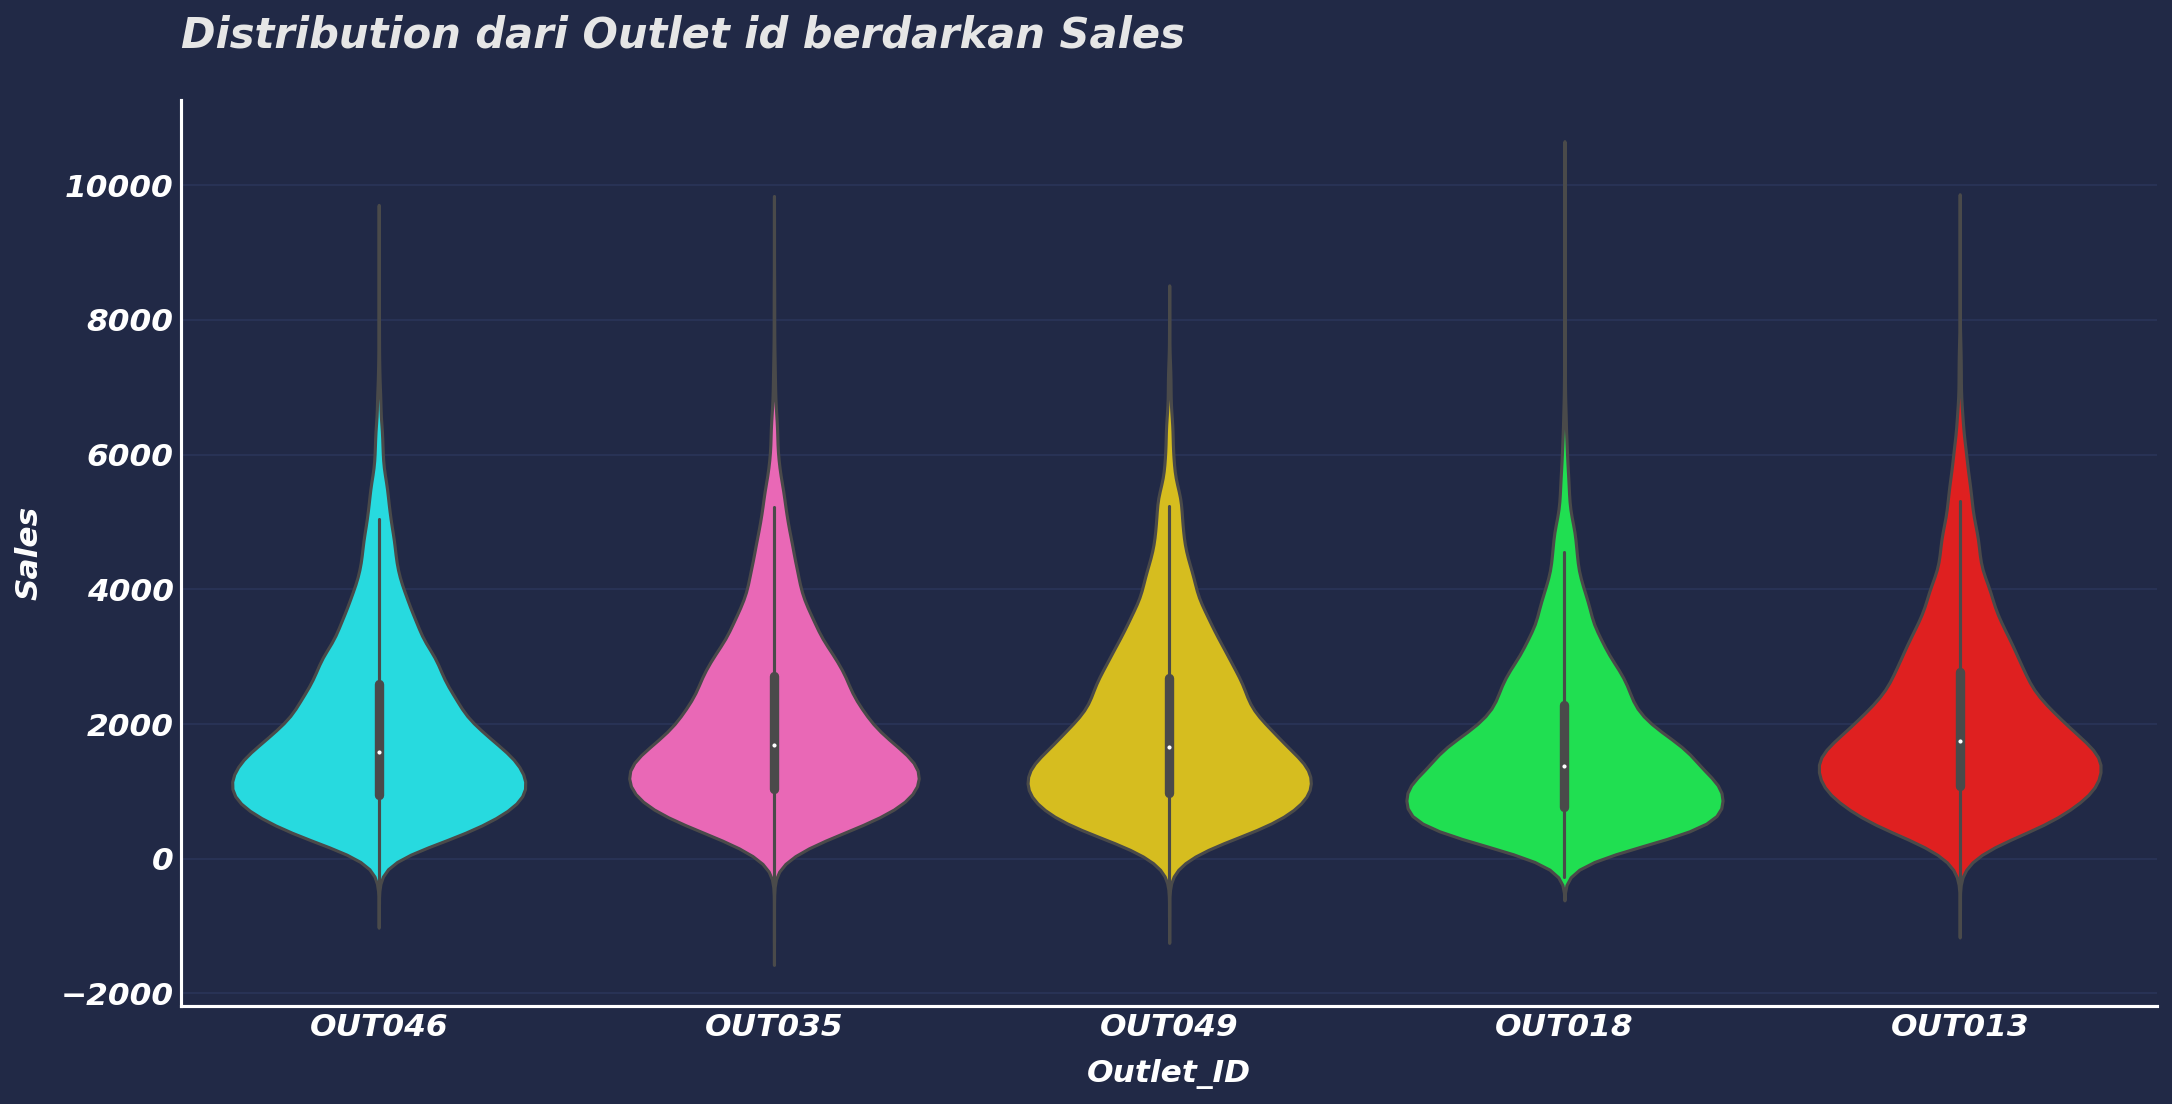

In [75]:
plt.figure(figsize=(17,8))

sns.violinplot(x=train.Outlet_ID,y=train.Sales)
plt.title("Distribution dari Outlet id berdarkan Sales")
#

In [78]:
# filter outlet id == out018

train.query("Outlet_ID == 'OUT018'")["Sales"].describe() 

count    17156.000000
mean      1658.457588
std       1197.967554
min       -276.646230
25%        770.875527
50%       1376.545973
75%       2281.885638
max      10309.283310
Name: Sales, dtype: float64

In [ ]:
# outlet size

In [21]:
train.Outlet_Size.value_counts()

Small     48614
Medium    26683
High      12567
Name: Outlet_Size, dtype: int64

Text(0, 0.5, 'Outlet Size')

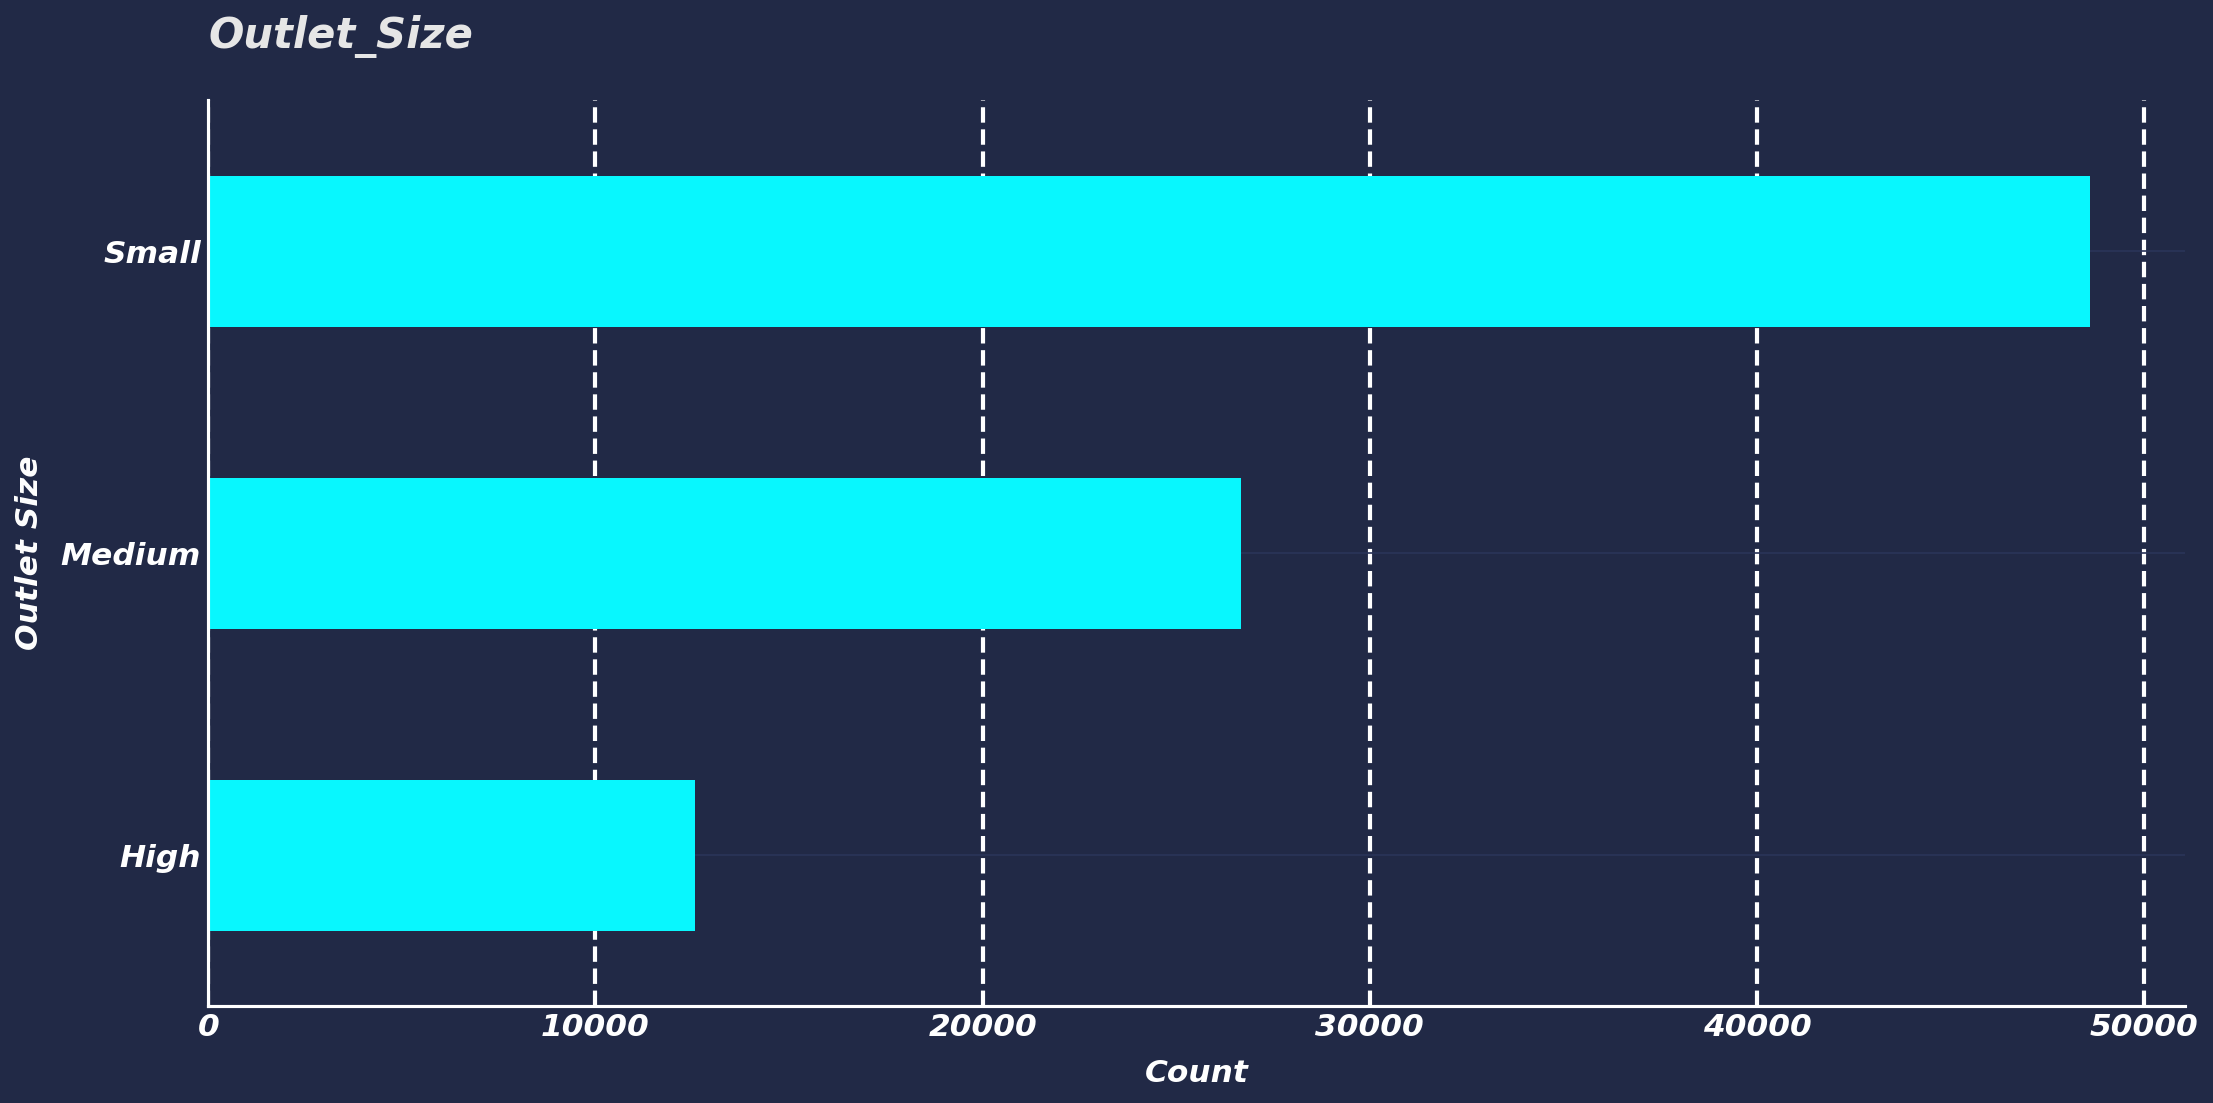

In [22]:
# plot Outlet size

train.Outlet_Size.value_counts().sort_values().plot(kind="barh", figsize=(17, 8)) 
plt.grid(axis="x", linewidth=2, linestyle="--", color="white") 

plt.title("Outlet_Size")
plt.xlabel("Count")
plt.ylabel("Outlet Size")

In [25]:
#  outlet size
# rata² Sales dari Outlet size

train.groupby("Outlet_Size")["Sales"].mean().to_frame().sort_values("Sales",ascending=False).style.bar(subset="Sales", color="red") 

Text(0, 0.5, 'Sales')

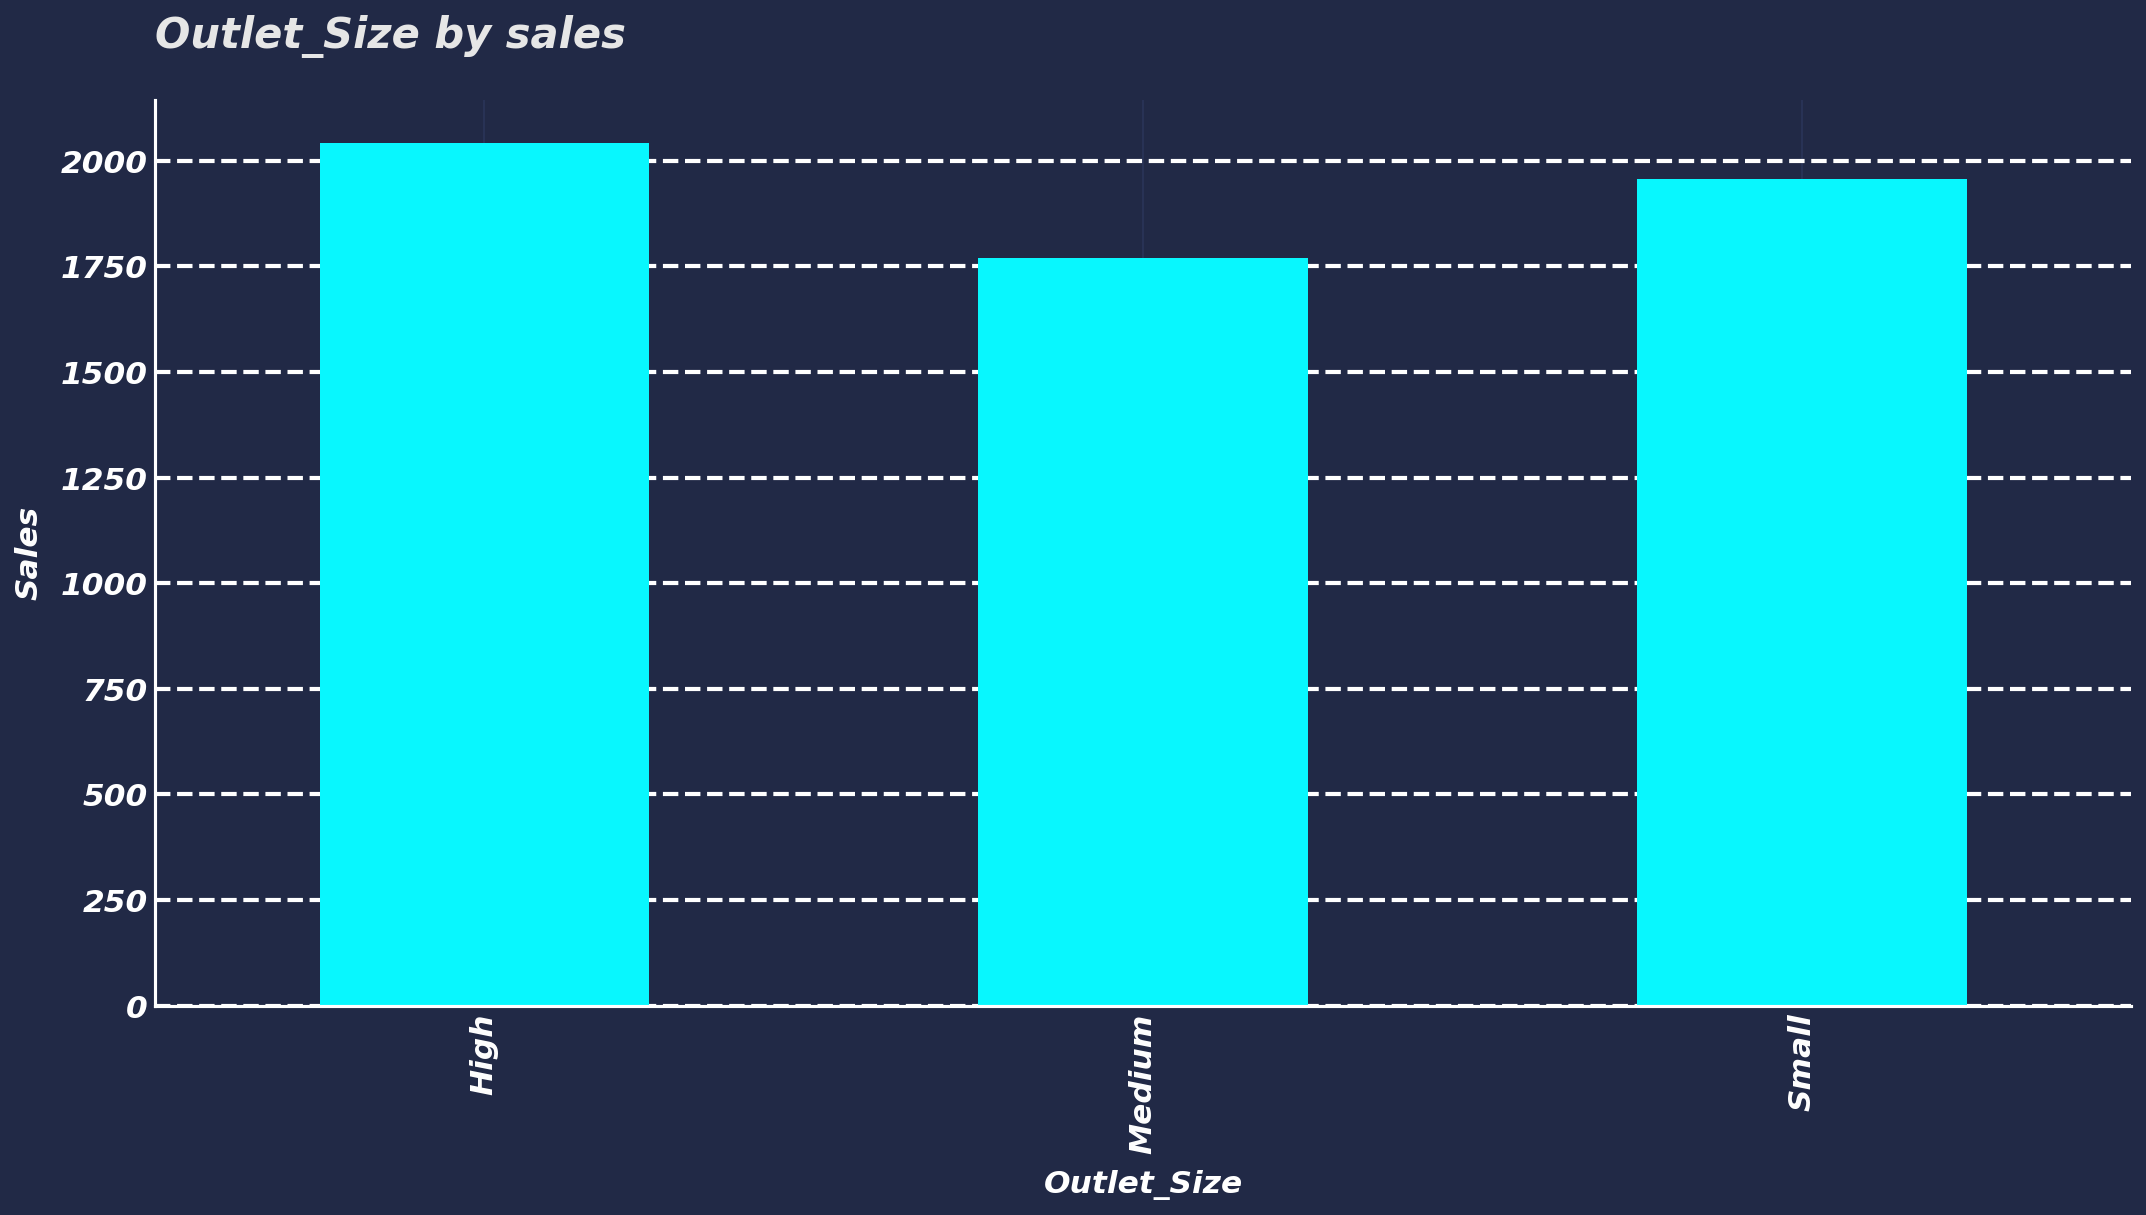

In [26]:
# plot Outlet size

train.groupby("Outlet_Size")["Sales"].mean().plot(kind="bar", figsize=(17, 8)) 
plt.grid(axis="y", linewidth=2, linestyle="--", color="white") 

plt.title("Outlet_Size by sales")
plt.xlabel("Outlet_Size")
plt.ylabel("Sales")

Text(0.0, 1.0, 'Distribution dari Outlet Size berdarkan Sales')

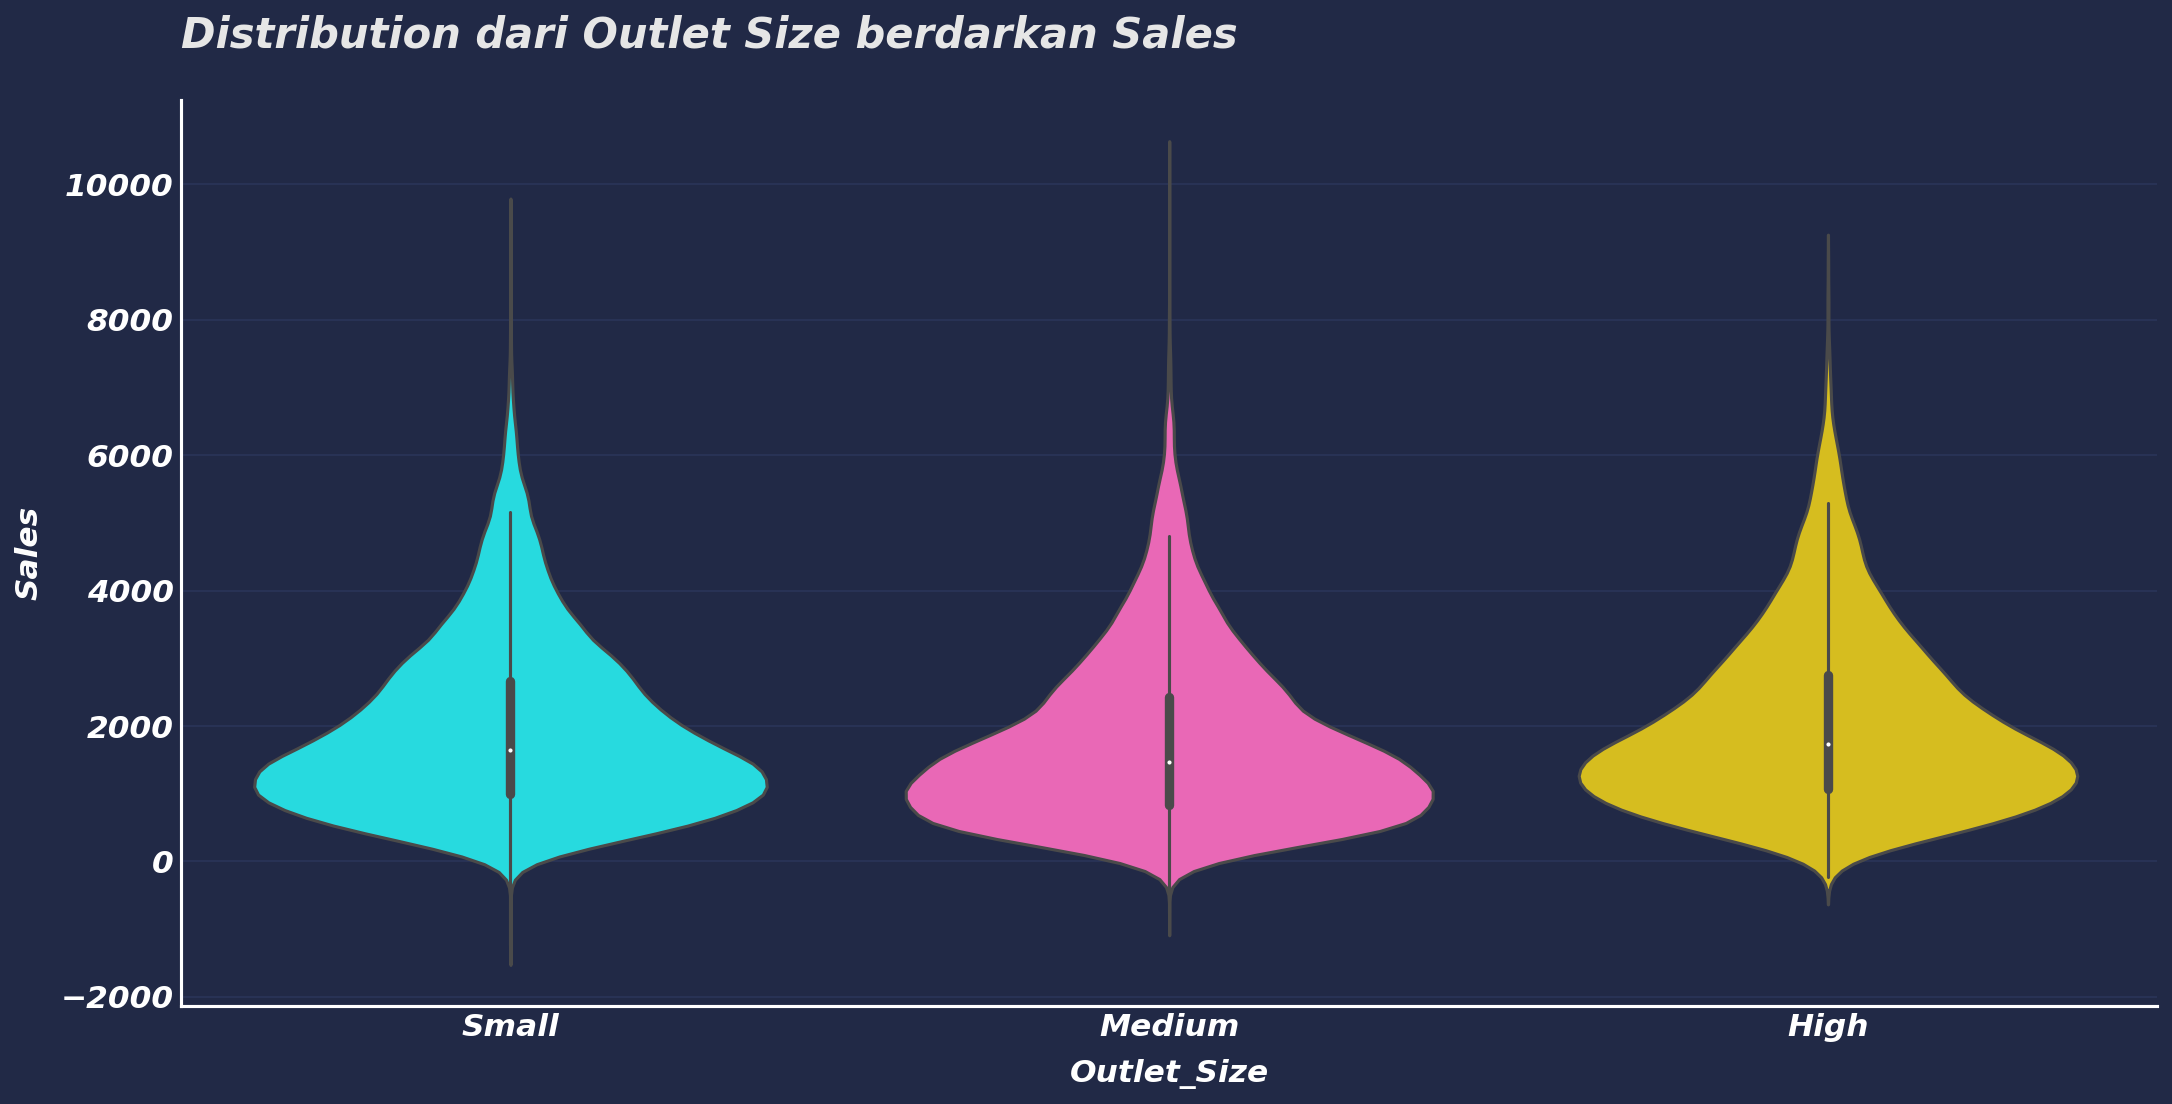

In [27]:
plt.figure(figsize=(17,8))

sns.violinplot(x=train.Outlet_Size,y=train.Sales)
plt.title("Distribution dari Outlet Size berdarkan Sales")

In [ ]:
#Outlet_Location_Type

In [28]:
train.Outlet_Location_Type.value_counts() 

Tier 1    33567
Tier 3    29044
Tier 2    25253
Name: Outlet_Location_Type, dtype: int64

Text(0, 0.5, 'Outlet_Location_Type Size')

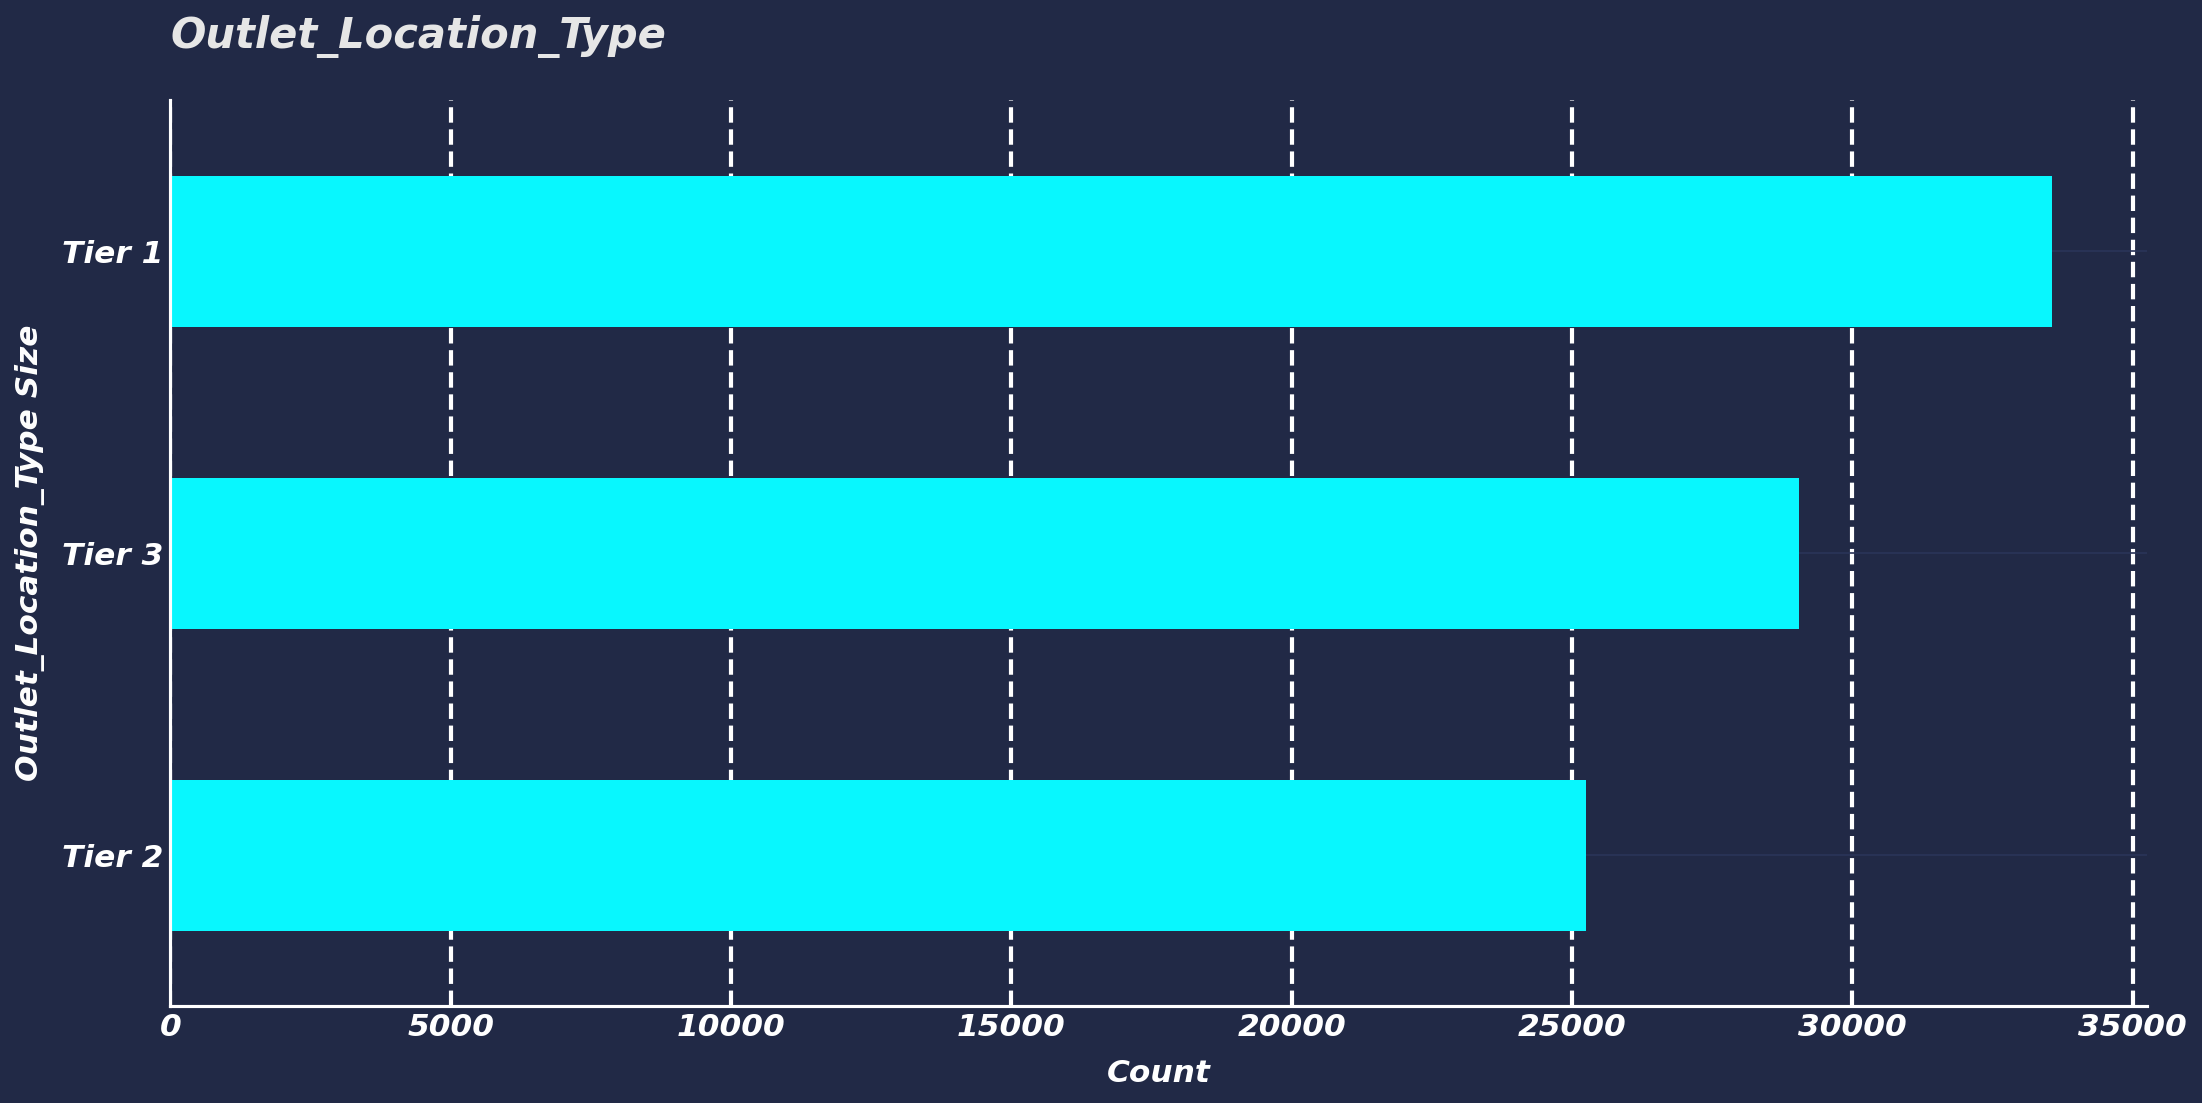

In [30]:
# plot Outlet location type

train.Outlet_Location_Type.value_counts().sort_values().plot(kind="barh", figsize=(17, 8)) 
plt.grid(axis="x", linewidth=2, linestyle="--", color="white") 

plt.title("Outlet_Location_Type")
plt.xlabel("Count")
plt.ylabel("Outlet_Location_Type Size")

In [31]:
#  outlet location type
# rata² Sales dari Outlet location type

train.groupby("Outlet_Location_Type")["Sales"].mean().to_frame().sort_values("Sales",ascending=False).style.bar(subset="Sales", color="red") 

Text(0, 0.5, 'Sales')

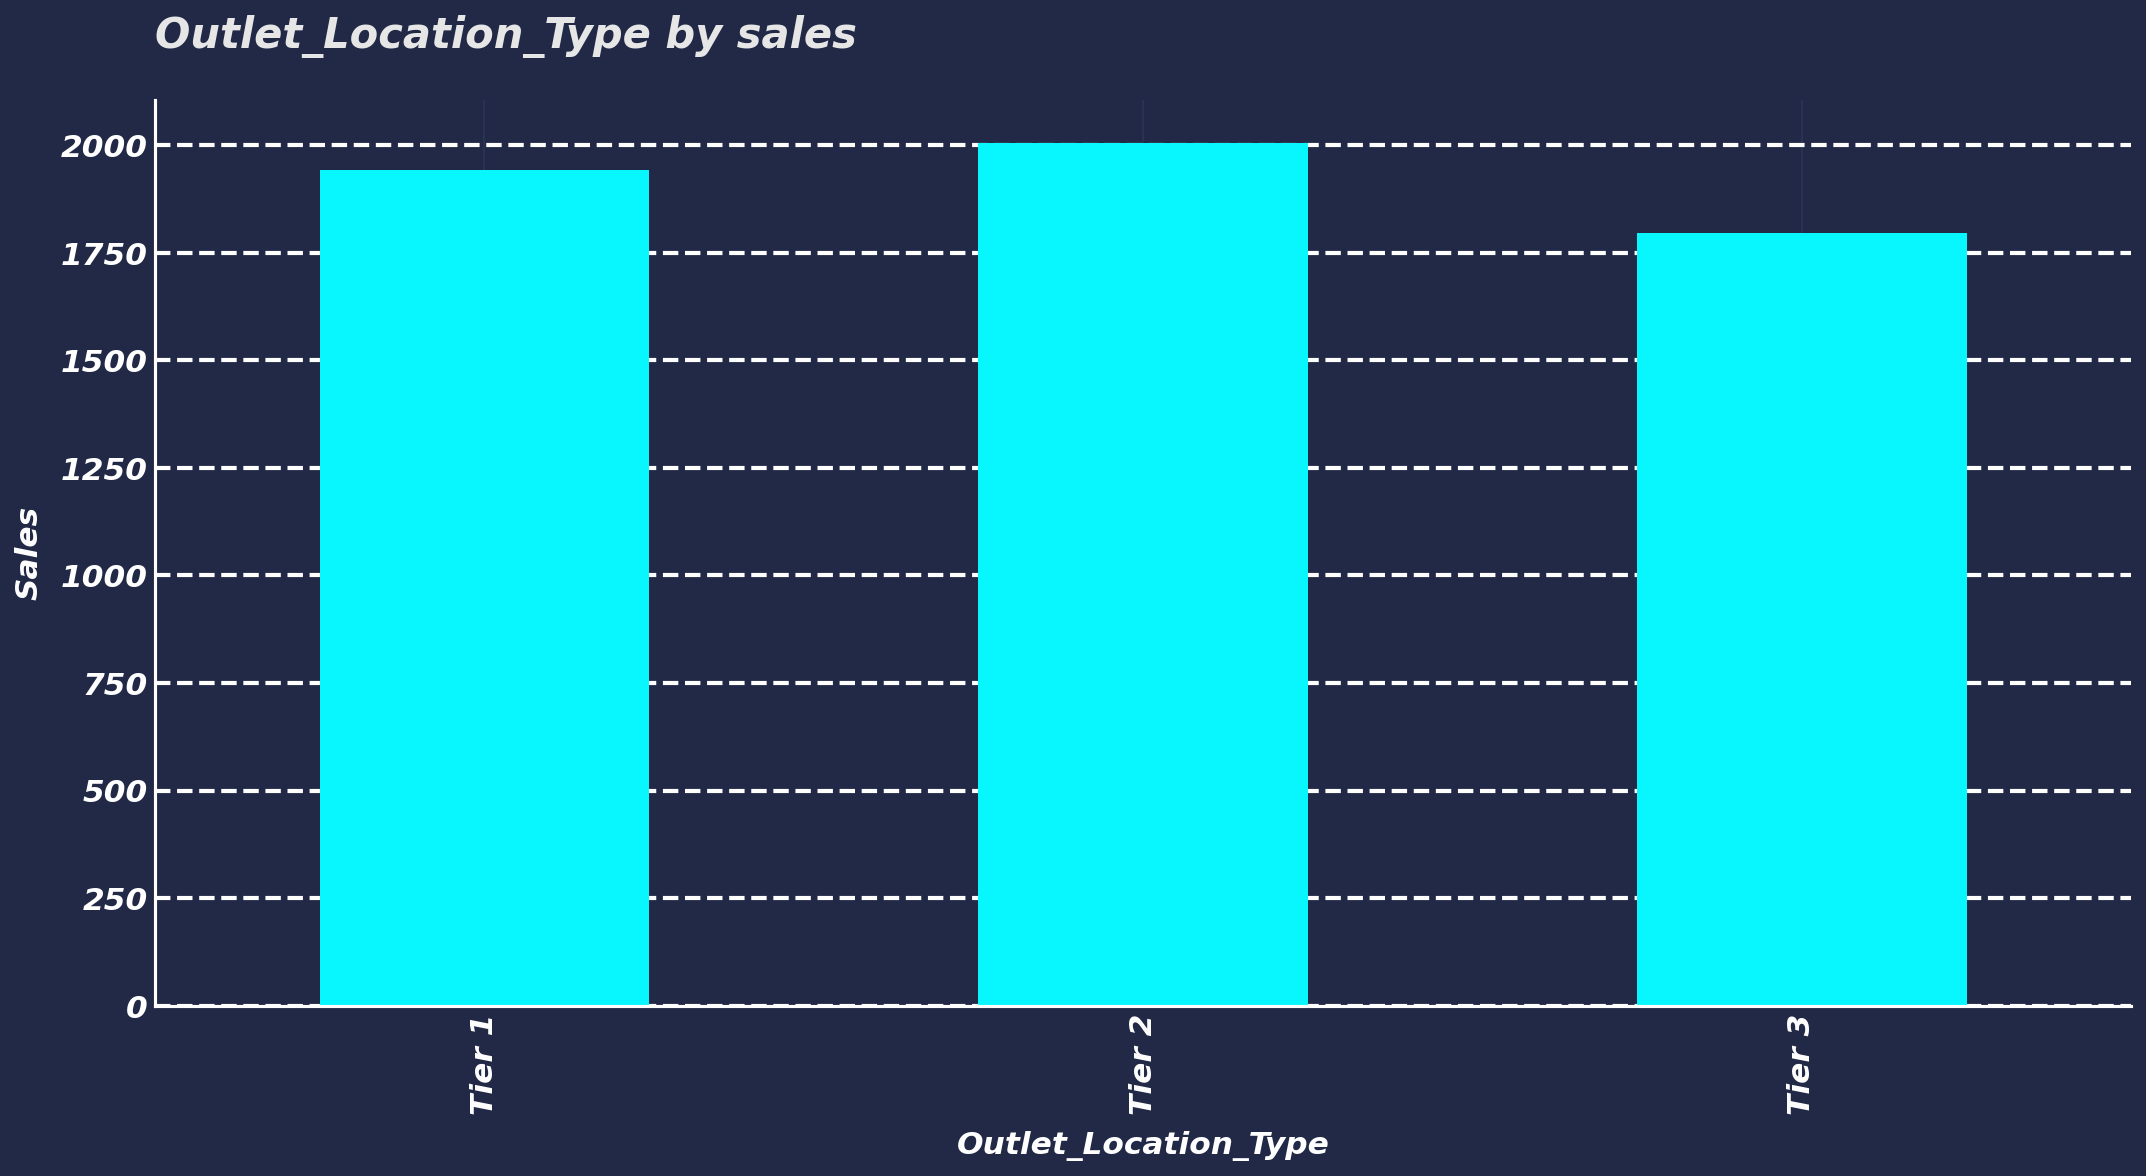

In [29]:
# plot Outlet location type

train.groupby("Outlet_Location_Type")["Sales"].mean().plot(kind="bar", figsize=(17, 8)) 
plt.grid(axis="y", linewidth=2, linestyle="--", color="white") 

plt.title("Outlet_Location_Type by sales")
plt.xlabel("Outlet_Location_Type")
plt.ylabel("Sales")

Text(0.0, 1.0, 'Distribution dari Outlet Local type berdarkan Sales')

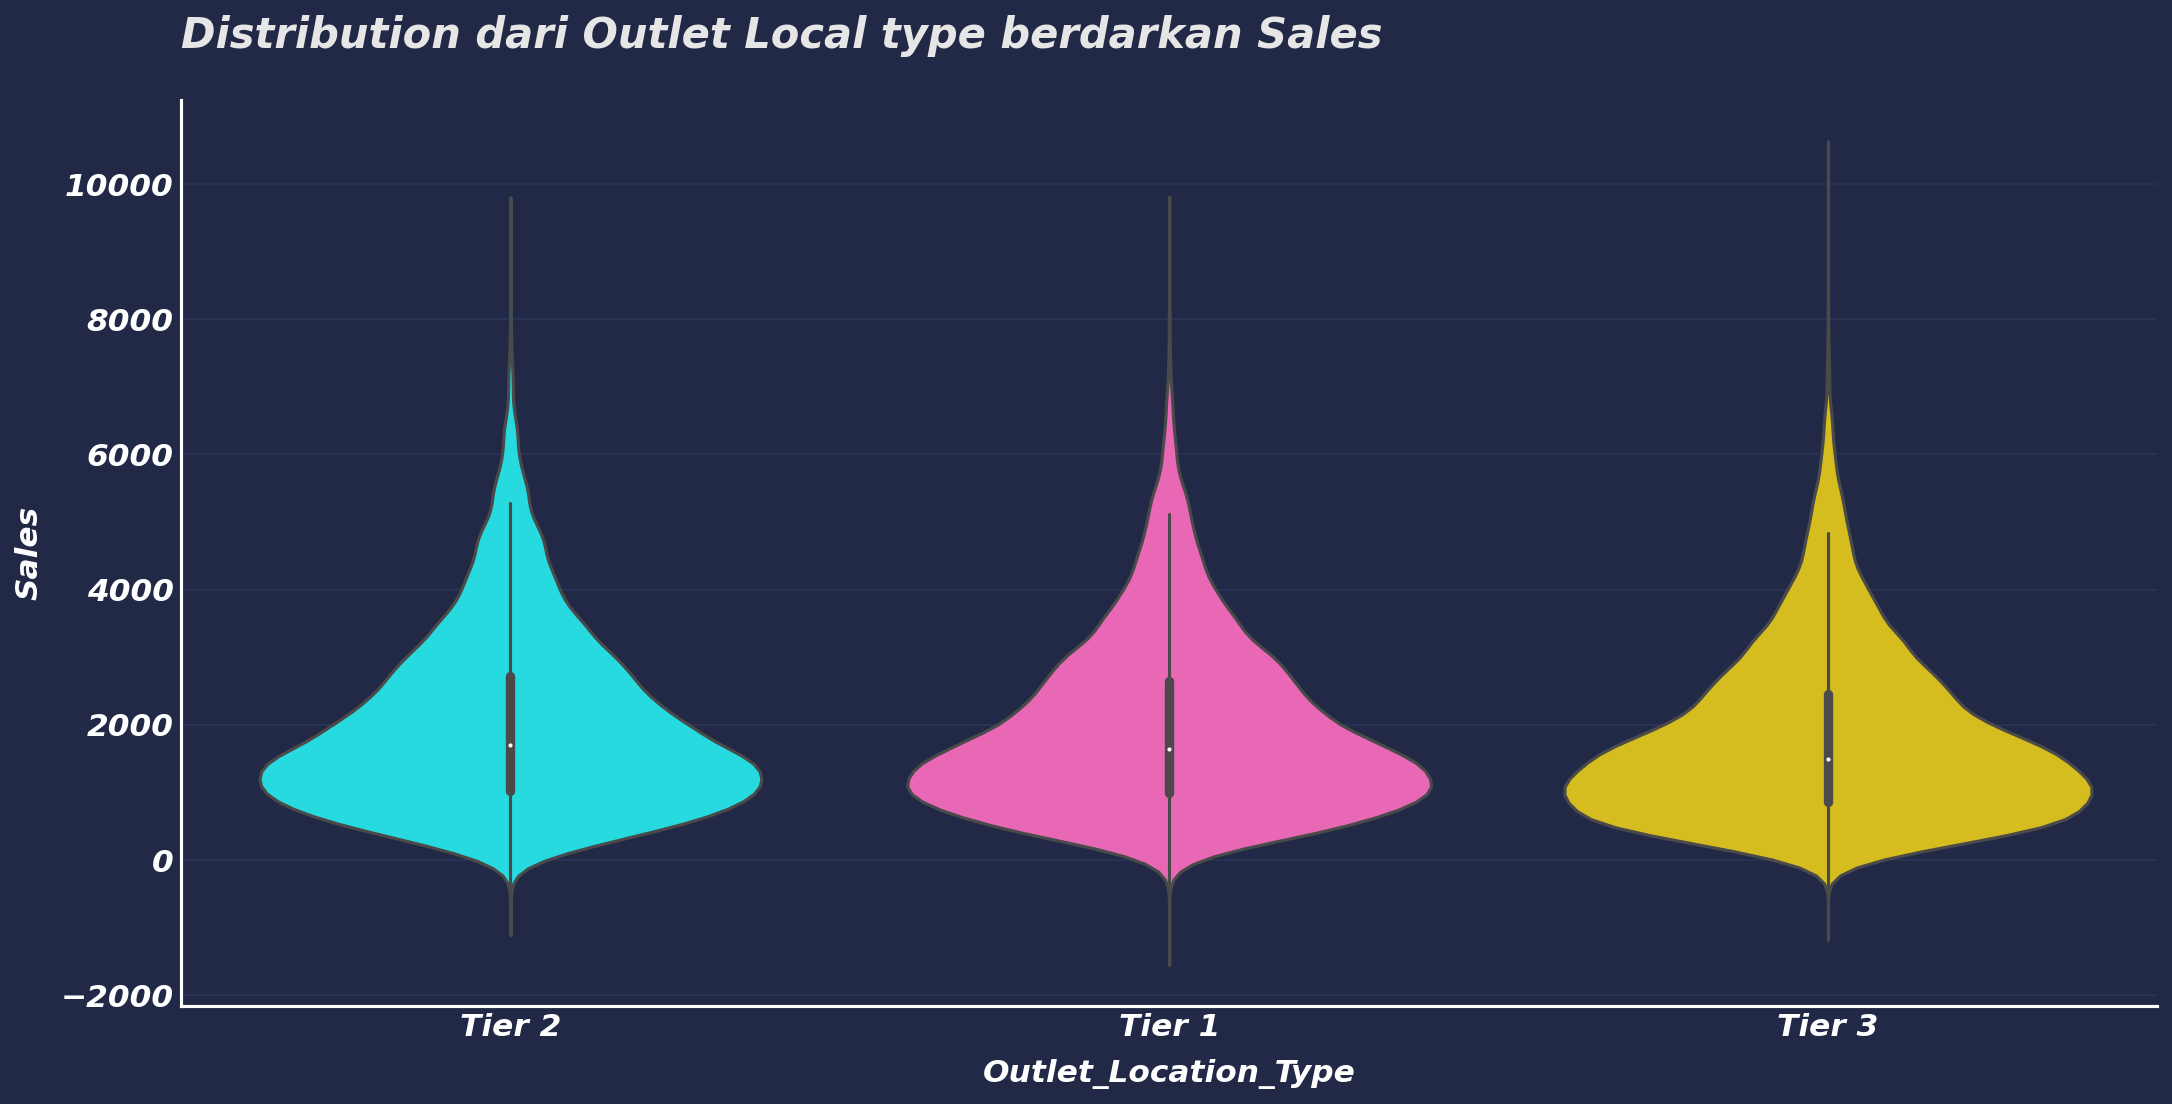

In [32]:
plt.figure(figsize=(17,8))

sns.violinplot(x=train.Outlet_Location_Type,y=train.Sales)
plt.title("Distribution dari Outlet Local type berdarkan Sales")

## numerical features

In [33]:
train[number].describe()

Item_W      Item_MRP  Outlet_Year
count  87864.000000  87864.000000  87864.00000
mean      15.591469    151.242943   1999.87063
std        4.364429     59.536366      6.63429
min        7.992700     32.910015   1987.00000
25%       10.968658    112.423337   1997.00000
50%       15.831170    145.581473   1999.00000
75%       19.969936    197.110367   2004.00000
max       21.250000    265.214271   2009.00000

In [ ]:
# item weight

skew: -0.1795340032733
kurt: -1.5325184089624038


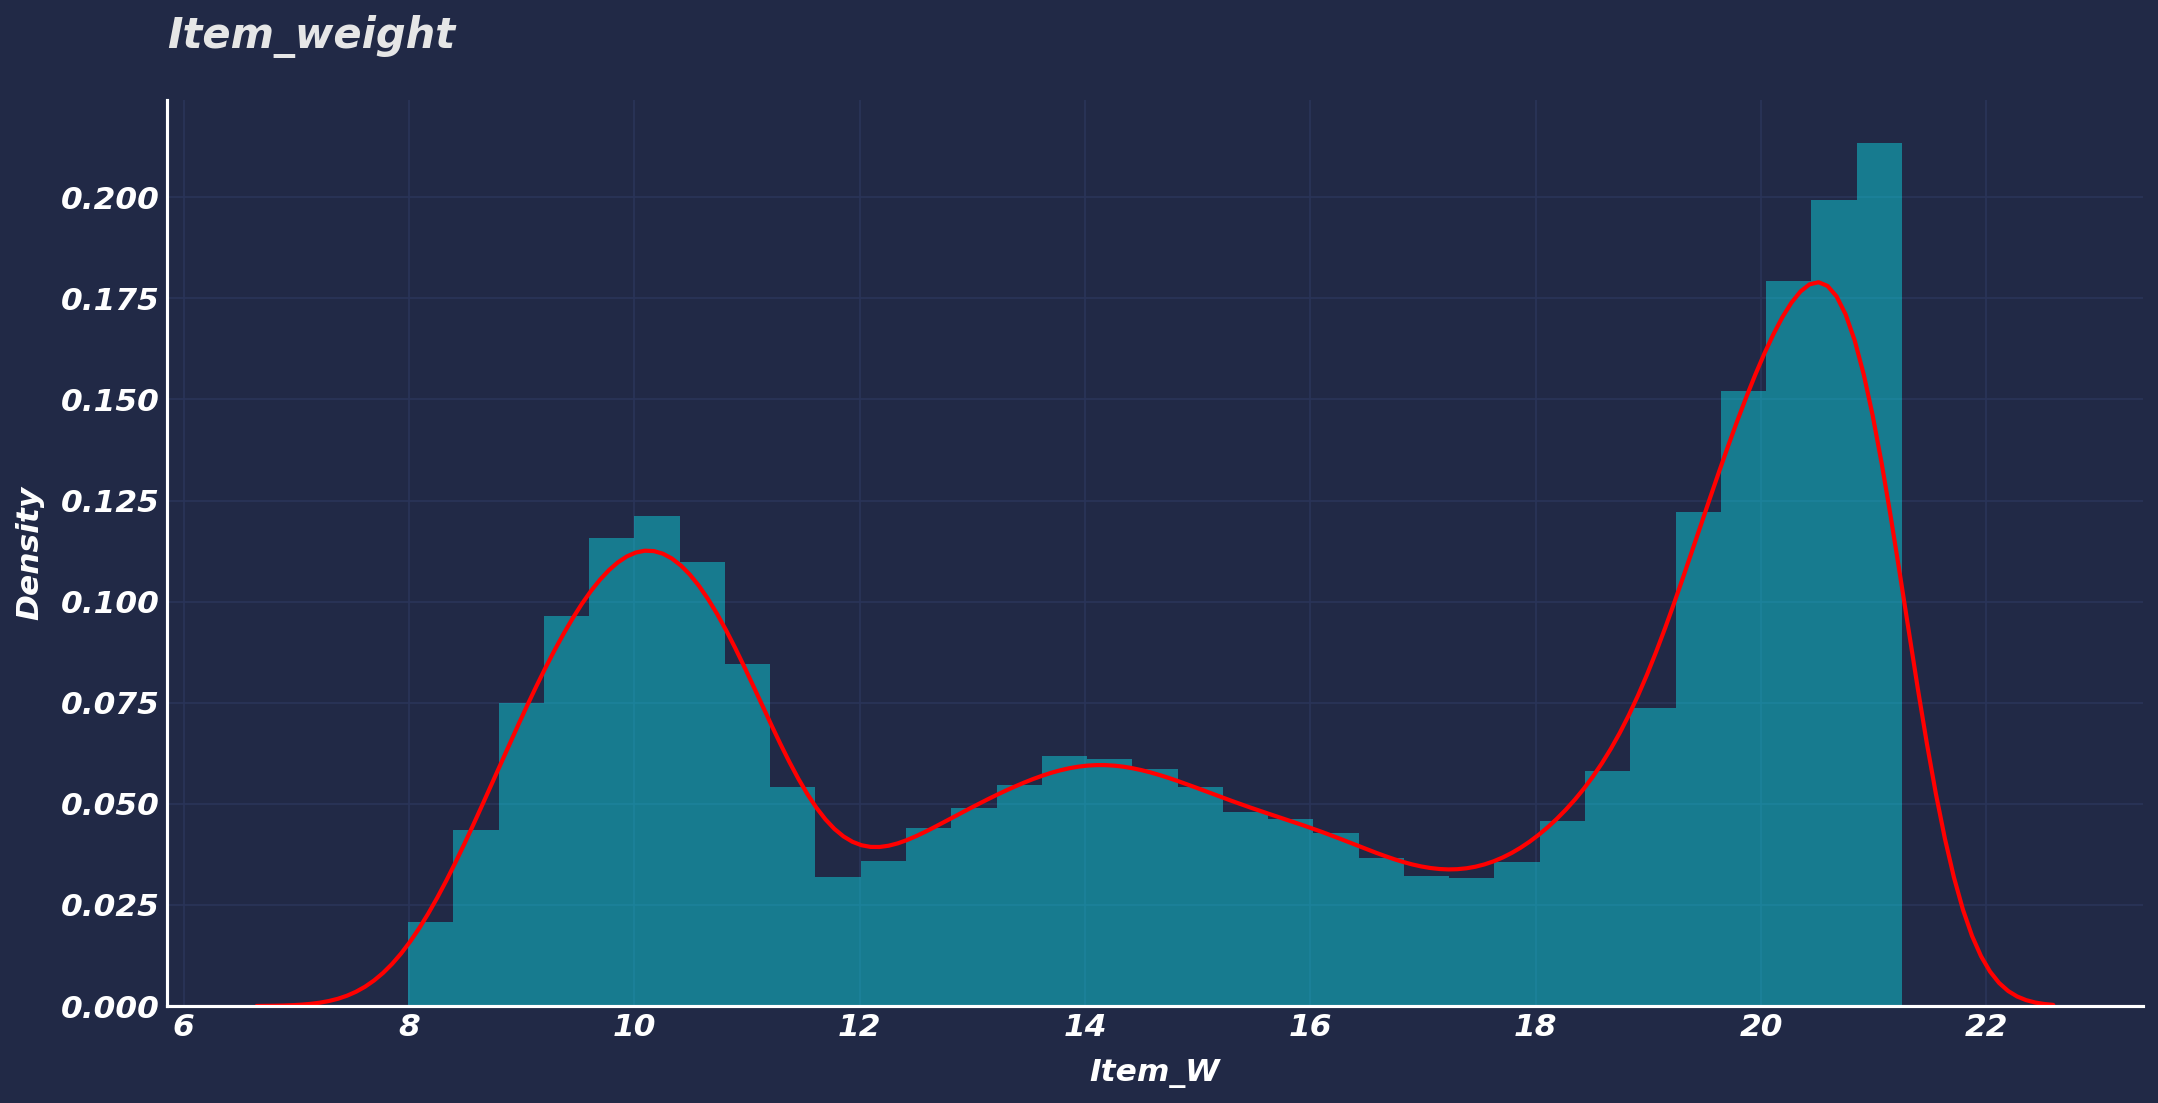

In [36]:
plt.figure(figsize=(17,8))

sns.distplot(train.Item_W,kde_kws={"color":"red","linewidth":2}) 
plt.title("Item_weight") 

print(f"skew: {train.Item_W.skew()}") 
print(f"kurt: {train.Item_W.kurt()}") 


In [40]:
train.query("Item_W > 18").Item_W.sample(10) 

64811    18.467290
22370    20.530152
20054    20.710097
5167     20.247021
17777    19.553073
21278    20.908847
868      19.825939
63209    19.189054
18144    20.013534
24031    21.146592
Name: Item_W, dtype: float64

In [41]:
# top 10 terberat 

train.Item_W.nlargest(10)

9611     21.250000
14806    21.250000
58172    21.250000
24863    21.249952
21748    21.249822
6911     21.249795
3949     21.249744
16151    21.249686
49695    21.249666
21176    21.249626
Name: Item_W, dtype: float64

In [13]:
#top 10 teringan

train.Item_W.nsmallest(10)

81588    7.992700
77113    7.994642
77117    7.994848
66567    7.995069
77116    7.998319
66568    7.998812
63091    7.999807
66566    8.006239
77112    8.007507
66292    8.008581
Name: Item_W, dtype: float64

Text(0.0, 1.0, 'Correlation Item_weight & Sales ')

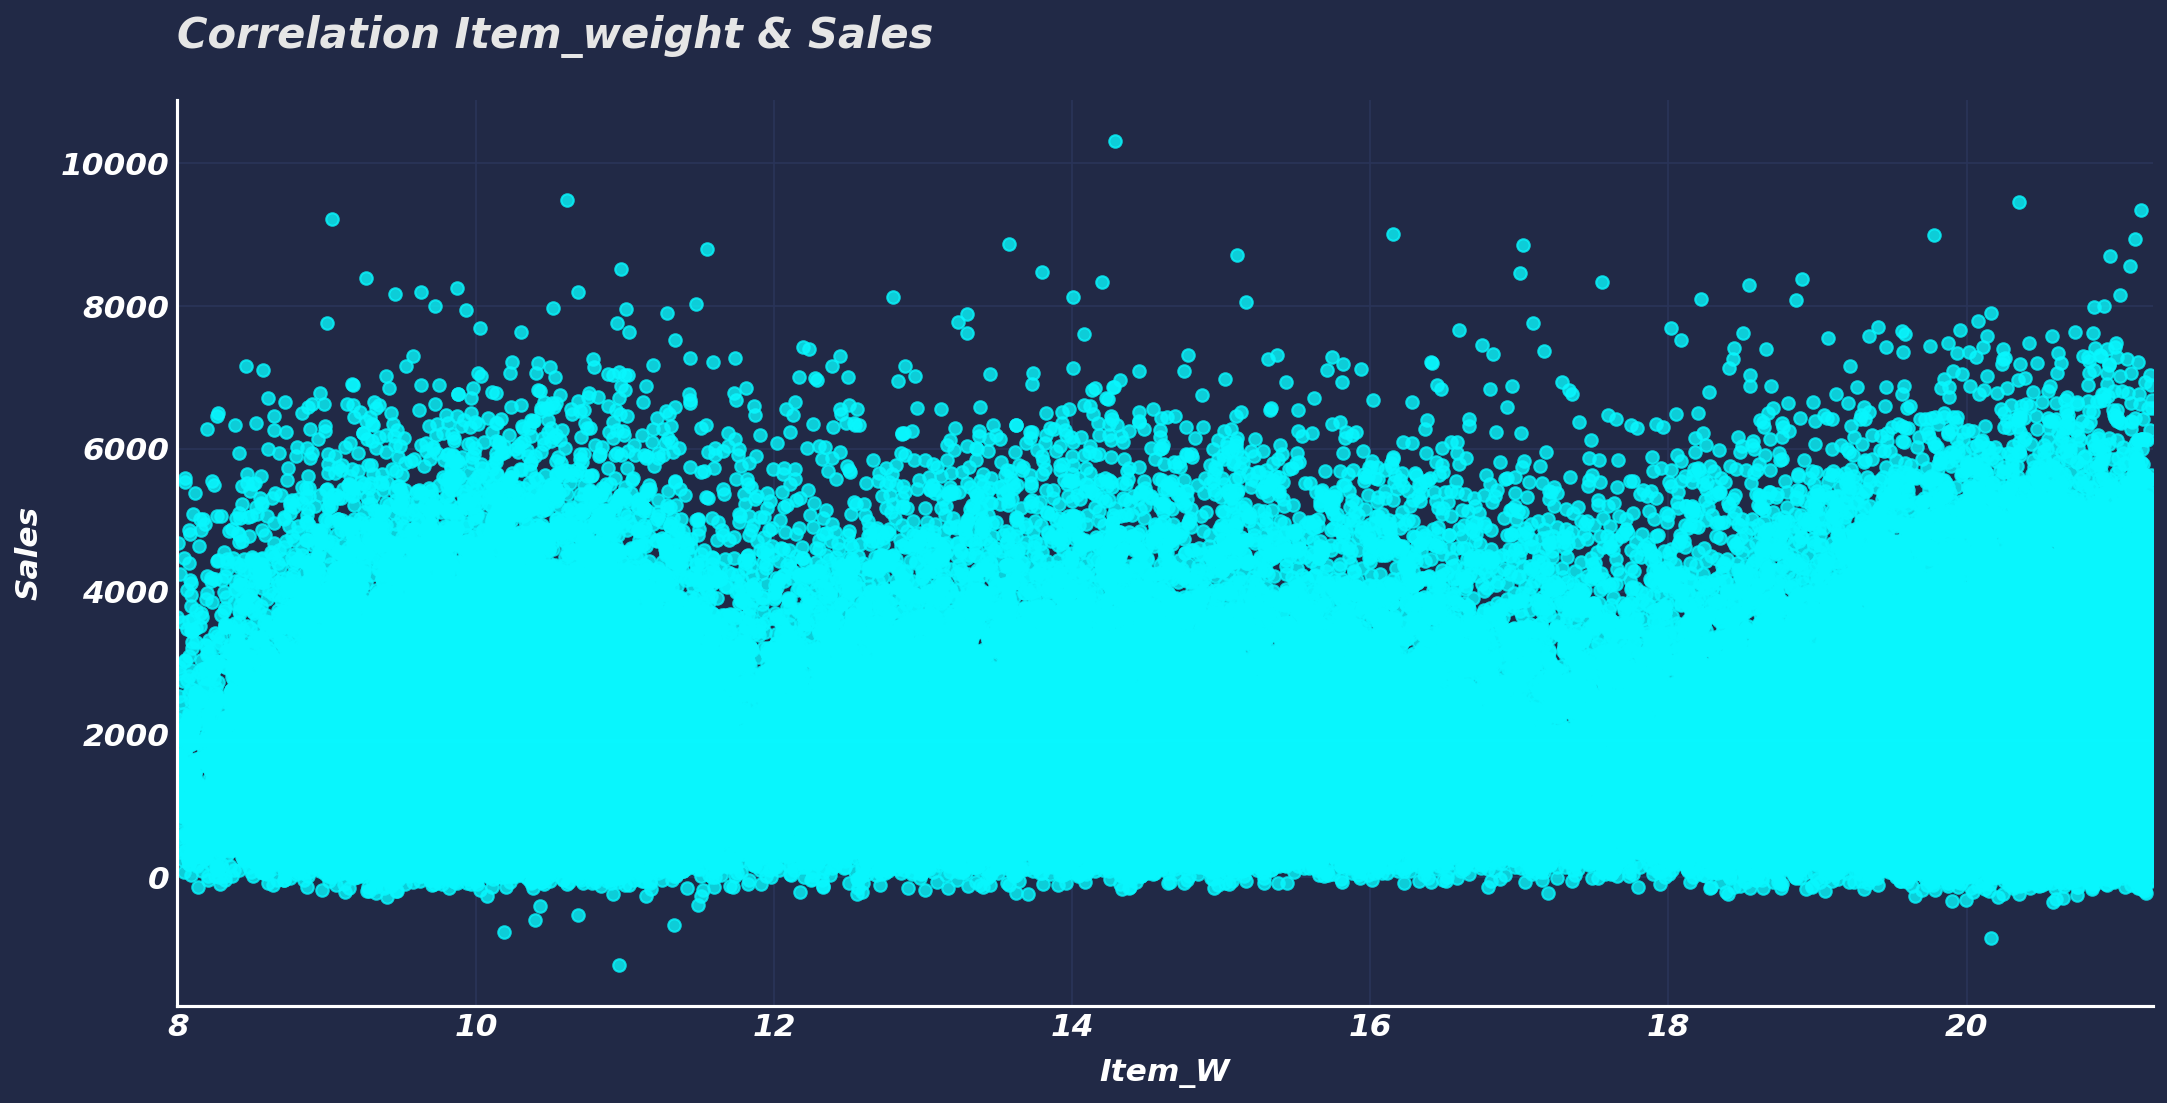

In [16]:
#check correlation
plt.figure(figsize=(17,8))

sns.regplot(x=train.Item_W, y=train.Sales)
plt.title("Correlation Item_weight & Sales ") 

In [ ]:
# item mrp

skew: 0.055661296453996
kurt: -0.8586926173796683


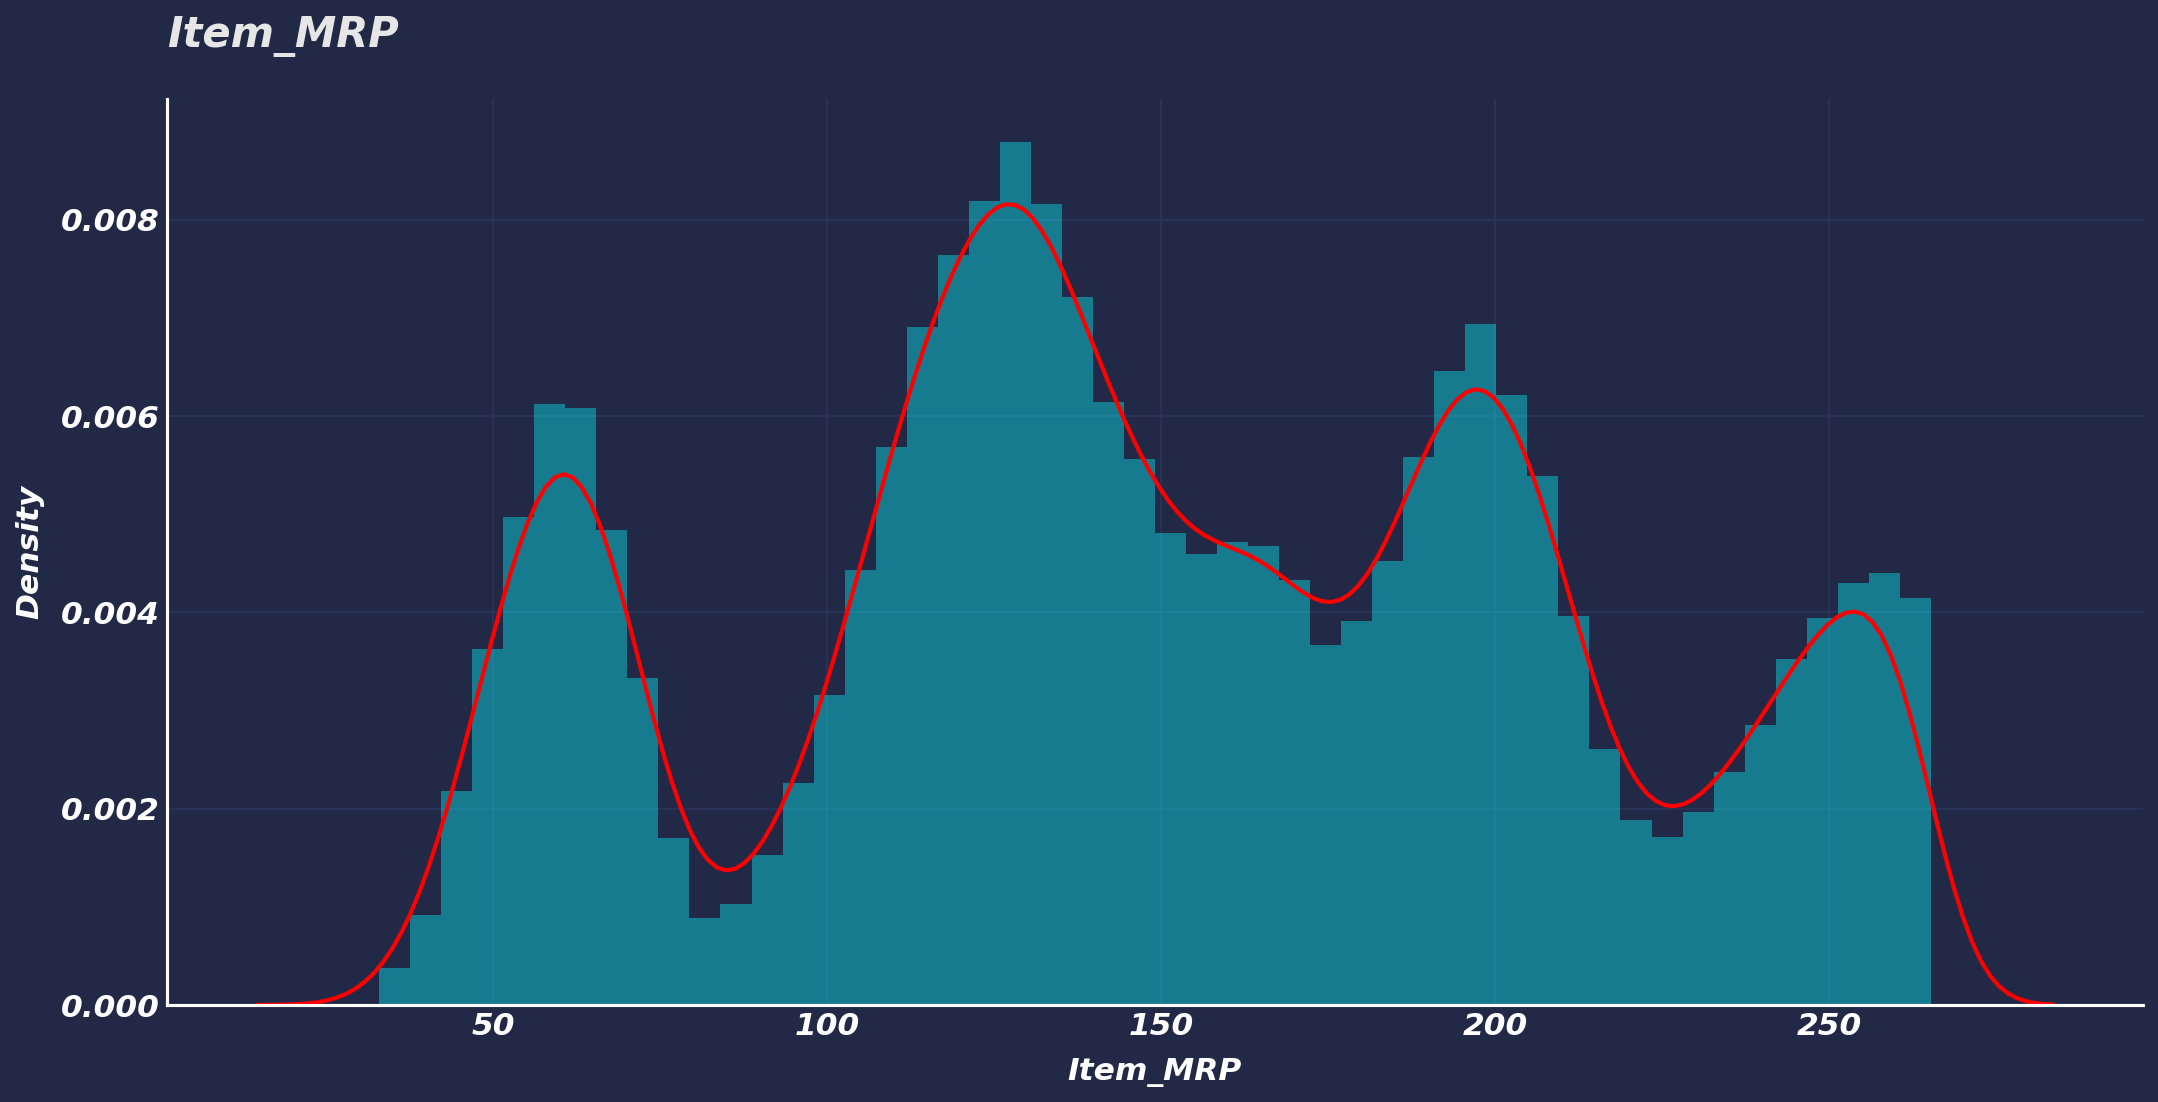

In [19]:
plt.figure(figsize=(17,8))

sns.distplot(train.Item_MRP,kde_kws={"color":"red","linewidth":2}) 
plt.title("Item_MRP") 

print(f"skew: {train.Item_MRP.skew()}") 
print(f"kurt: {train.Item_MRP.kurt()}") 


In [20]:
# top 10 item mrp

train.Item_MRP.nlargest(10)

28560    265.214271
34517    265.210295
629      265.207308
42702    265.206724
12631    265.195276
63456    265.193785
22974    265.192773
85956    265.192207
37762    265.189920
74607    265.187179
Name: Item_MRP, dtype: float64

In [23]:
# top 10 MRP dari bawah 

train.Item_MRP.nsmallest(10)

63076    32.910015
63064    32.919876
49670    32.942747
60739    32.960885
11005    32.967124
6028     33.091721
26607    33.175828
21222    33.238977
63229    33.355800
11051    33.438077
Name: Item_MRP, dtype: float64

Text(0.0, 1.0, 'Correlation Item_MRP & Sales ')

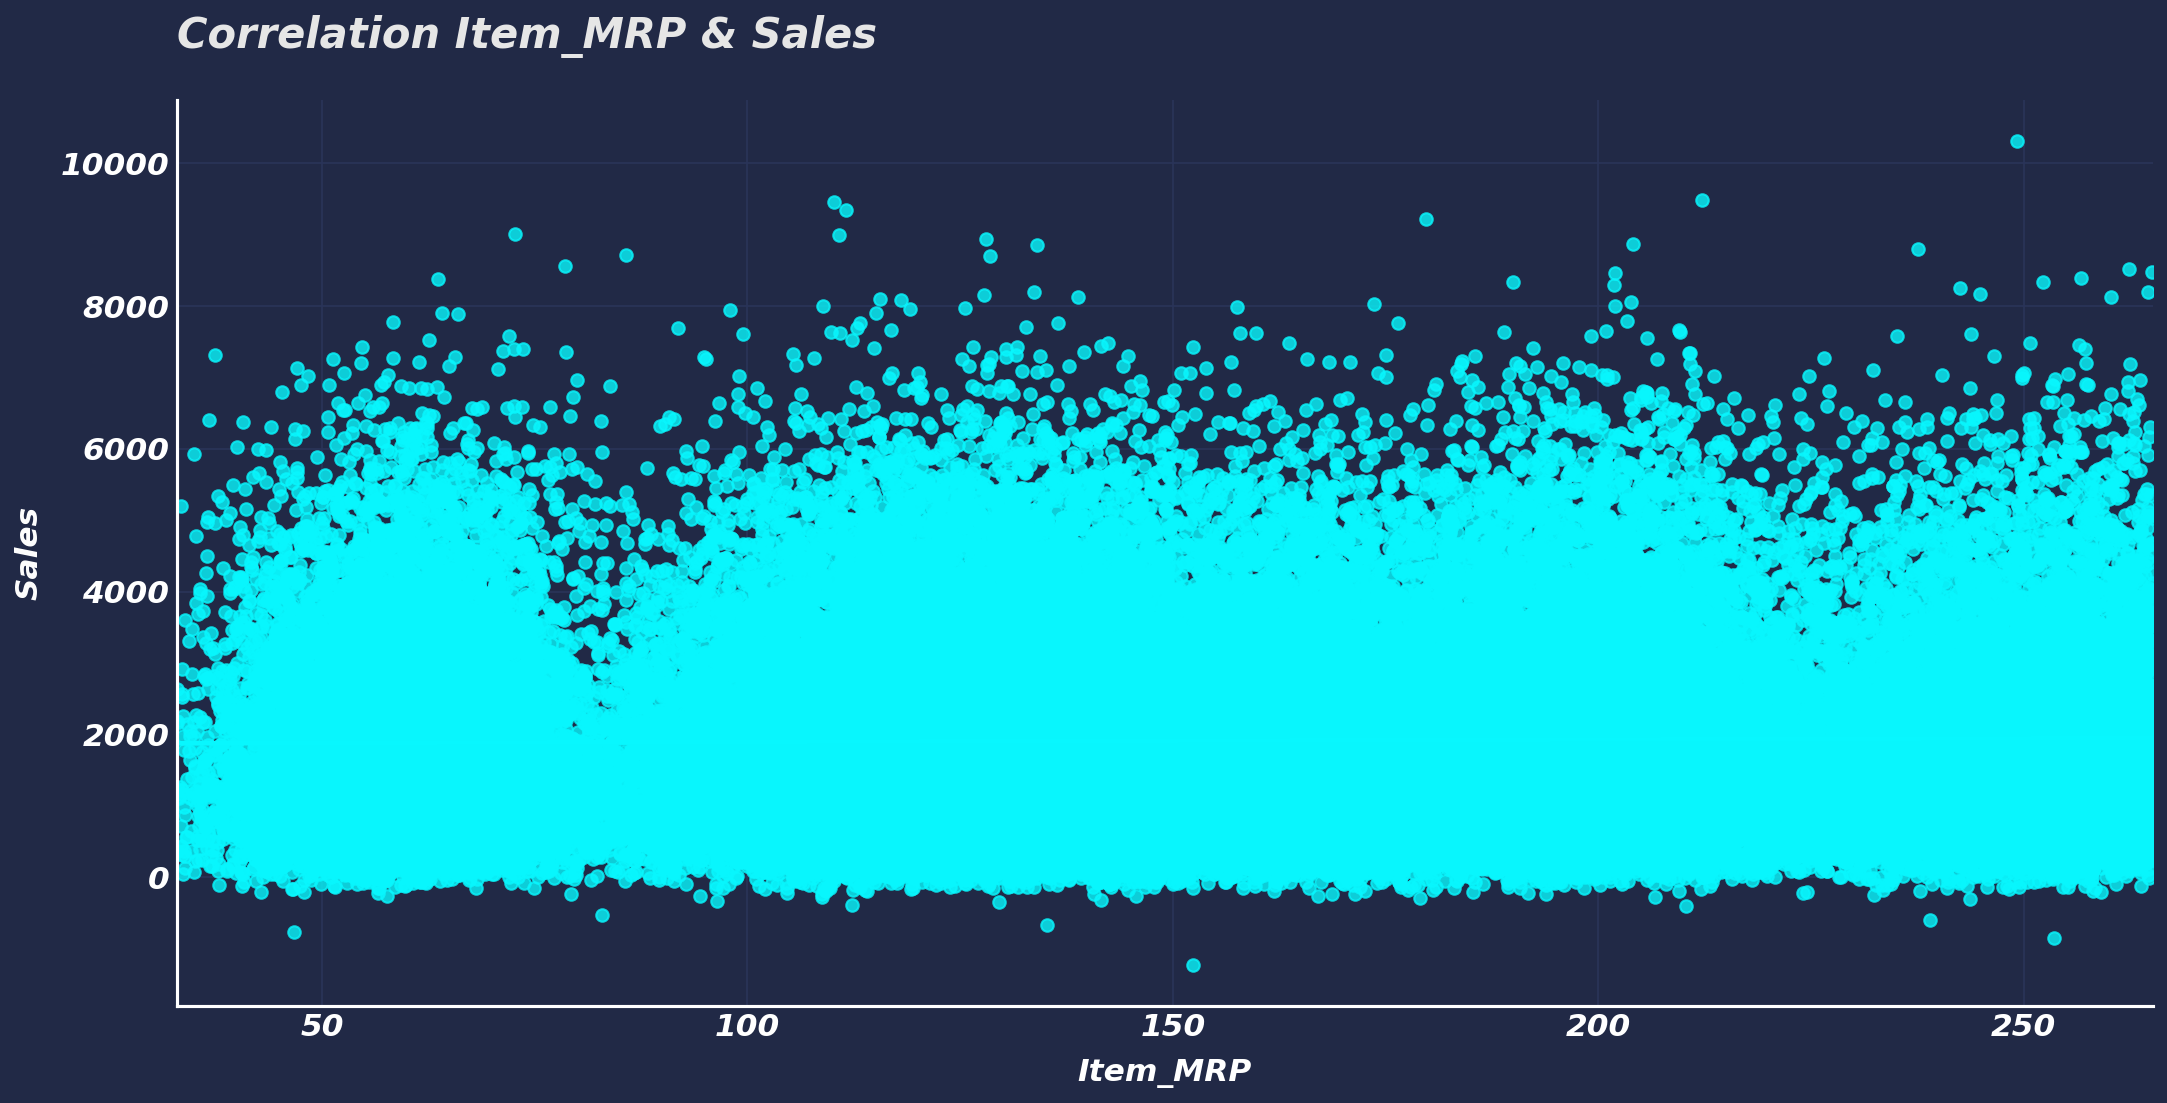

In [24]:
#check correlation
plt.figure(figsize=(17,8))

sns.regplot(x=train.Item_MRP, y=train.Sales)
plt.title("Correlation Item_MRP & Sales ") 

In [ ]:
# outlet year

In [30]:
train.Outlet_Year.value_counts().sort_index() 

1987    10357
1988     1440
1996     4684
1997    16916
1998     3798
1999    13046
2003     4622
2004    15197
2005       16
2007       20
2008     4106
2009    13662
Name: Outlet_Year, dtype: int64

Text(0, 0.5, 'Outlet_Year')

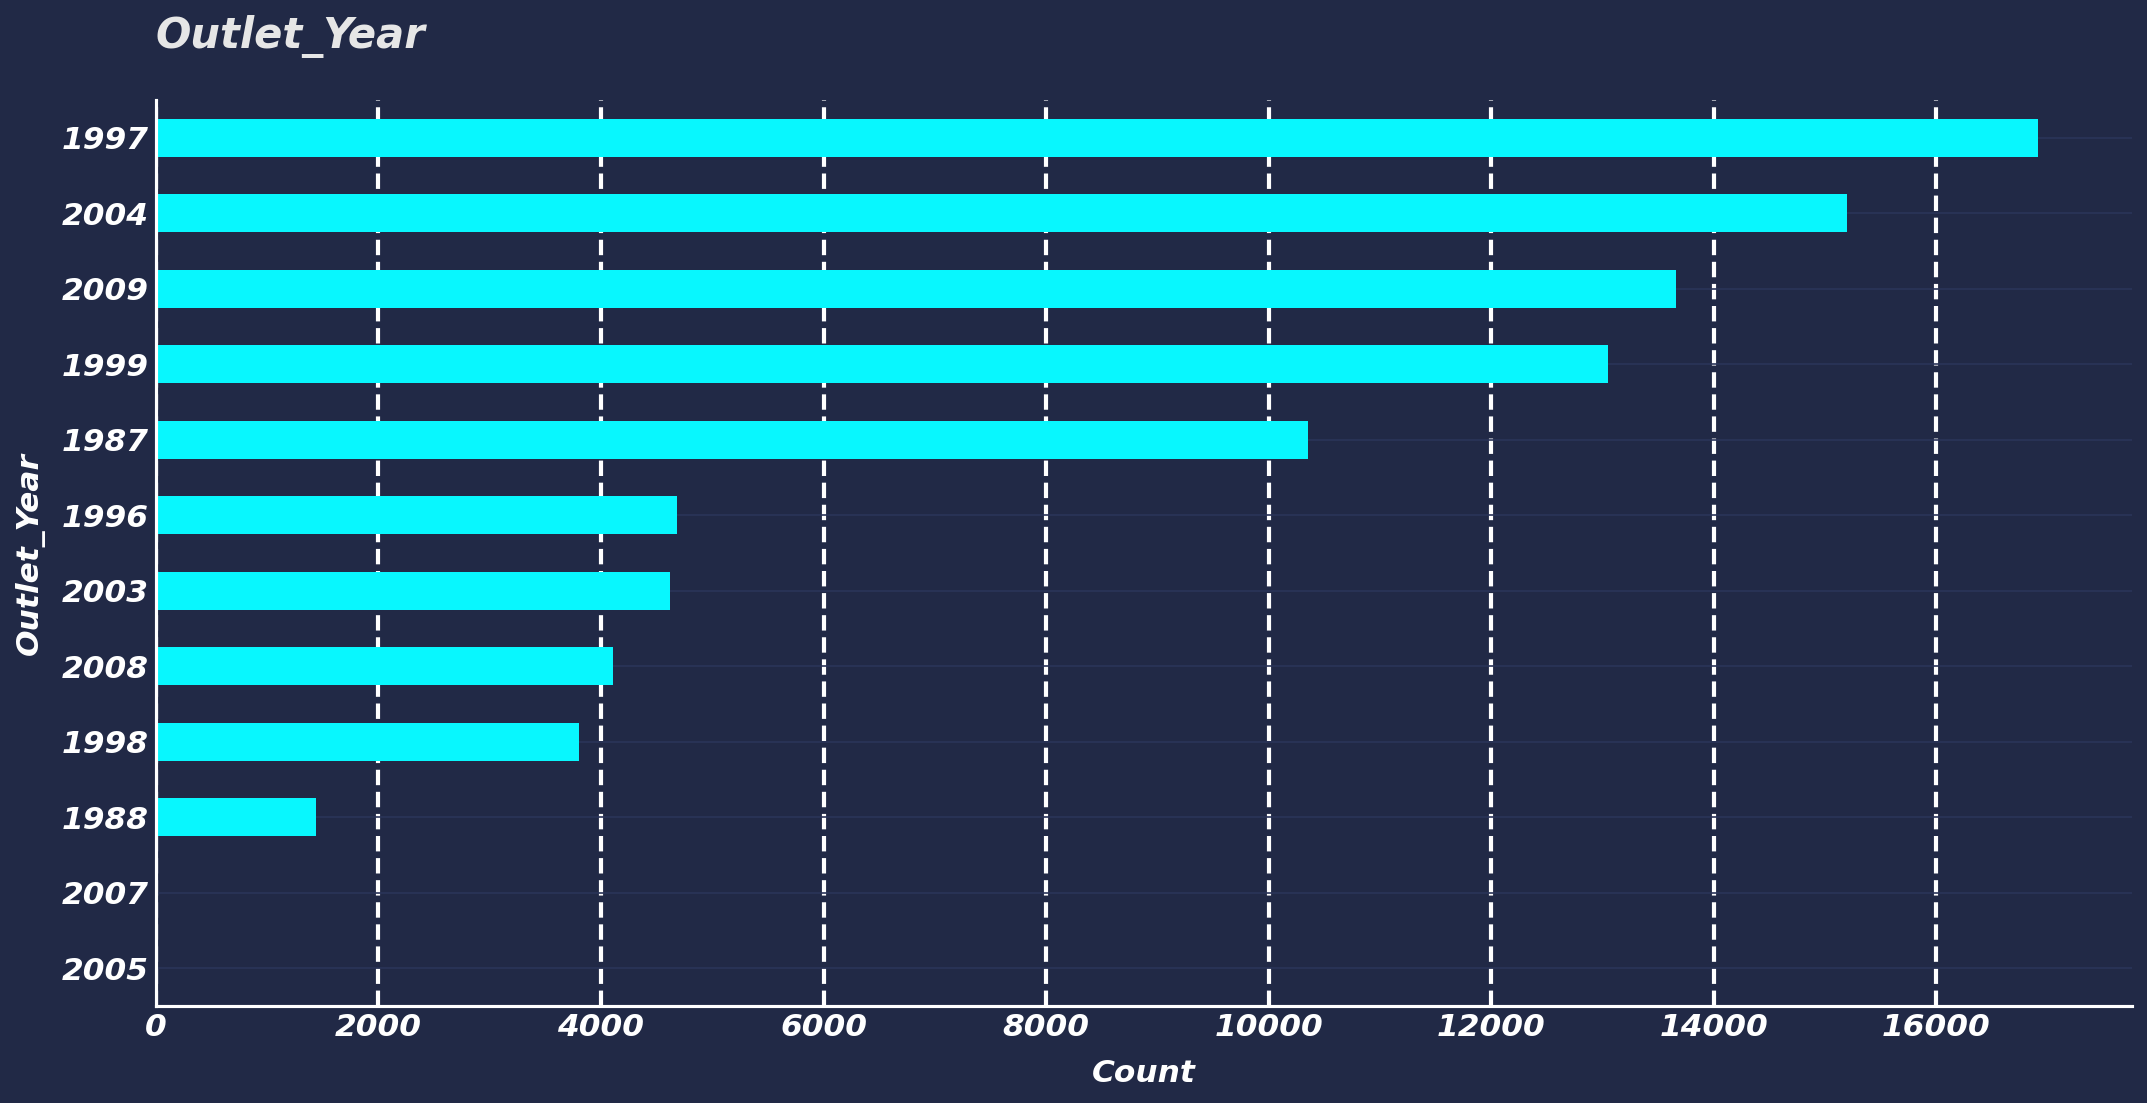

In [29]:
# plot Outlet Year

train.Outlet_Year.value_counts().sort_values().plot(kind="barh", figsize=(17, 8)) 
plt.grid(axis="x", linewidth=2, linestyle="--", color="white") 

plt.title("Outlet_Year")
plt.xlabel("Count")
plt.ylabel("Outlet_Year")

In [31]:
#  outlet year
# rata² Sales dari Outlet year

train.groupby("Outlet_Year")["Sales"].mean().to_frame().sort_values("Sales",ascending=False).style.bar(subset="Sales", color="red") 

Text(0, 0.5, 'Sales')

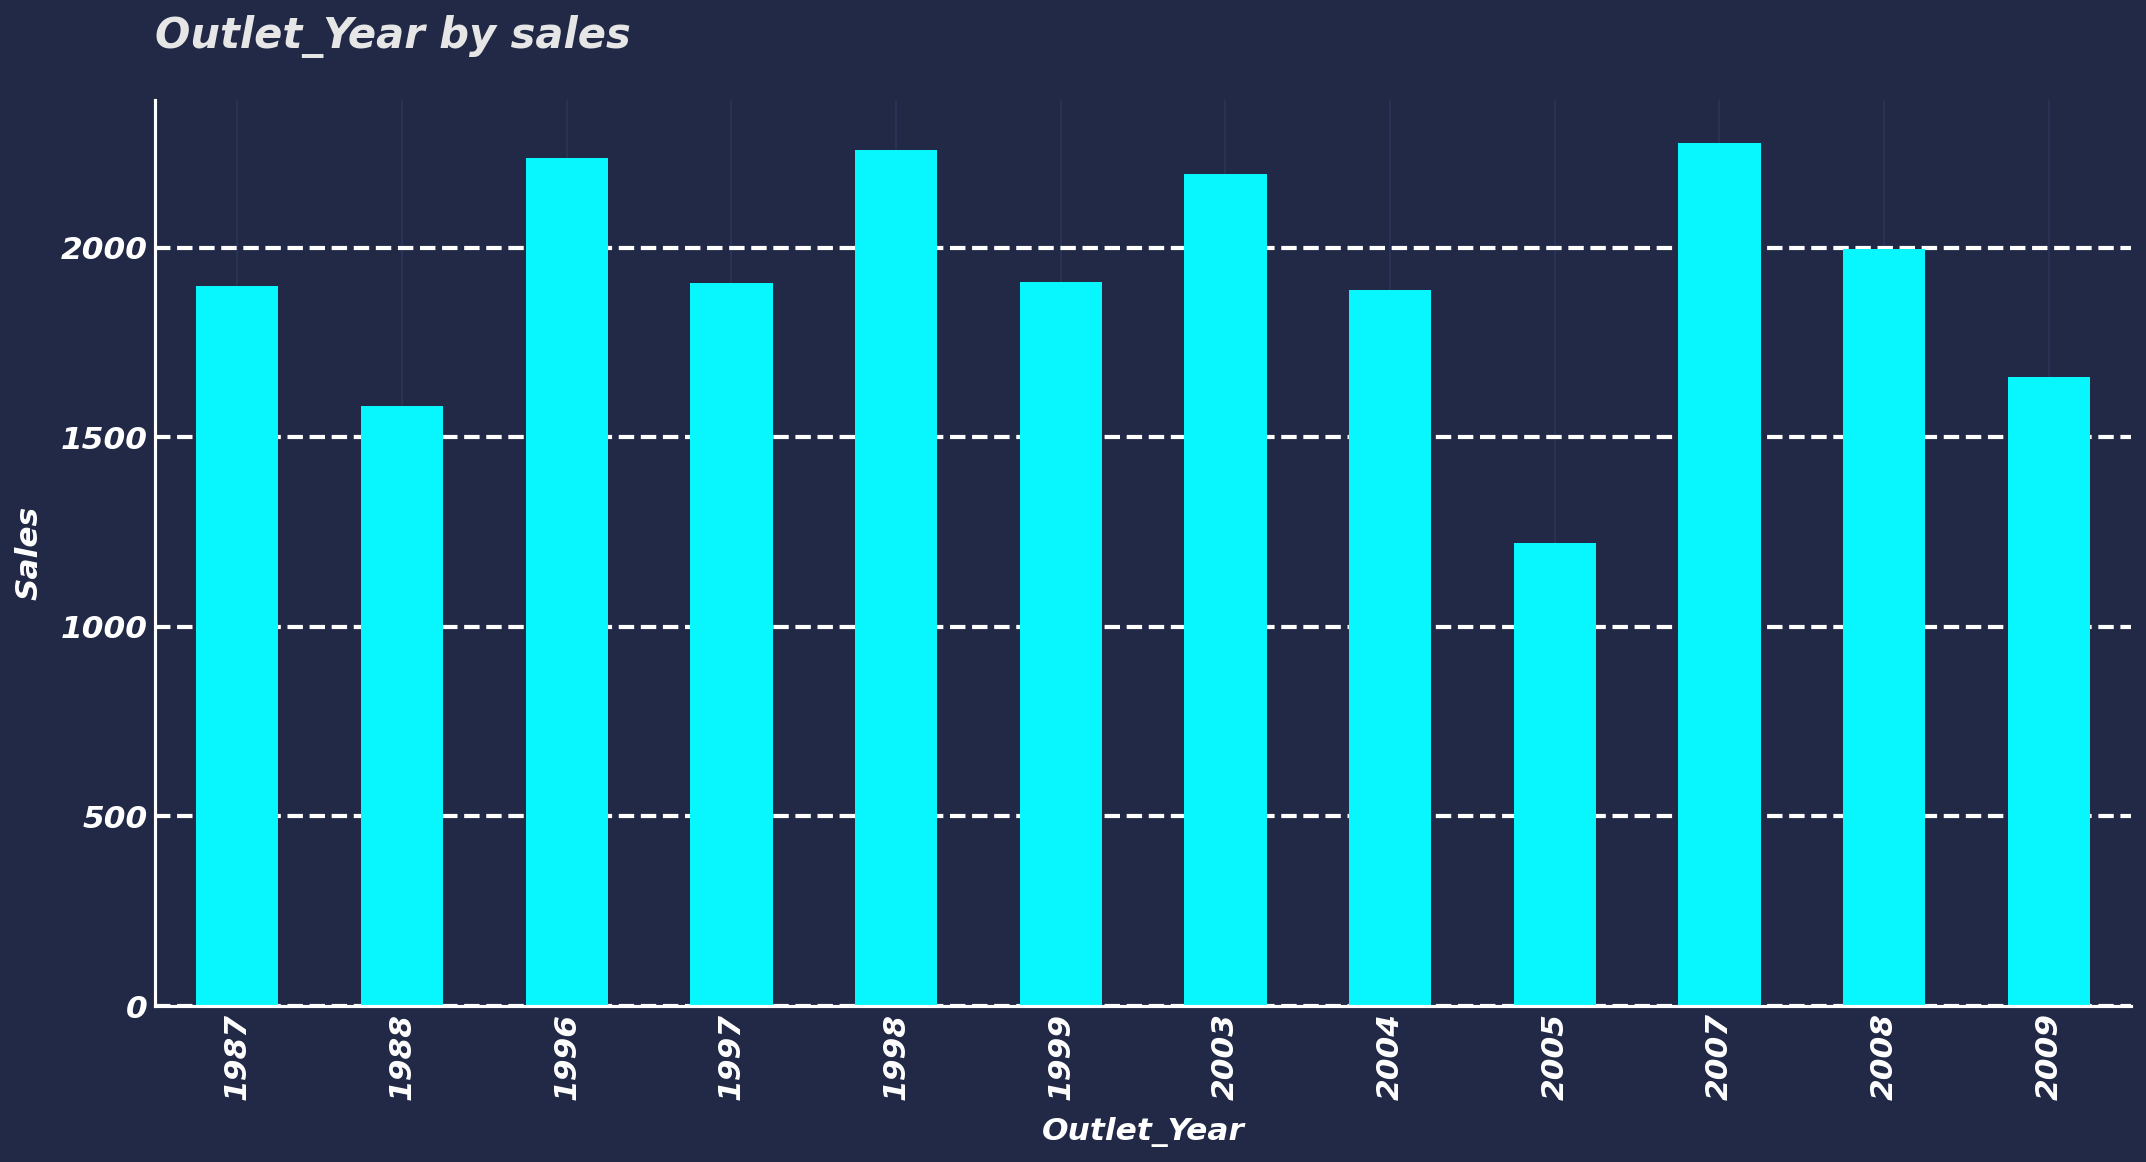

In [36]:
# plot Outlet year

train.groupby("Outlet_Year")["Sales"].mean().plot(kind="bar", figsize=(17, 8)) 
plt.grid(axis="y", linewidth=2, linestyle="--", color="white") 

plt.title("Outlet_Year by sales")
plt.xlabel("Outlet_Year")
plt.ylabel("Sales")

In [32]:
train.query("Outlet_Year == 2005").Sales.describe()

count      16.000000
mean     1222.323421
std       902.579579
min       -70.855119
25%       753.692315
50%      1068.424262
75%      1700.311848
max      3511.533698
Name: Sales, dtype: float64

In [39]:
lebih_2000 = train.query("Outlet_Year >= 2000").Outlet_Year
kurang_2000 = train.query("Outlet_Year < 2000").Outlet_Year

In [40]:
#  outlet year lebih 2000
# rata² Sales dari Outlet year

train.groupby(lebih_2000)["Sales"].mean().to_frame().sort_values("Sales",ascending=False).style.bar(subset="Sales", color="red") 

In [41]:
#  outlet year kurang 2000
# rata² Sales dari Outlet year

train.groupby(kurang_2000)["Sales"].mean().to_frame().sort_values("Sales",ascending=False).style.bar(subset="Sales", color="red") 

In [42]:
train.Outlet_Year.astype("object").describe()

count     87864
unique       12
top        1997
freq      16916
Name: Outlet_Year, dtype: int64

In [48]:
# binning untuk mencegah high cardinality

bins_year = train.Outlet_Year.apply(lambda x: ">2000" if x > 2000 else "<2000") 

In [49]:
bins_year.value_counts() 

<2000    50241
>2000    37623
Name: Outlet_Year, dtype: int64

Text(0, 0.5, 'Count')

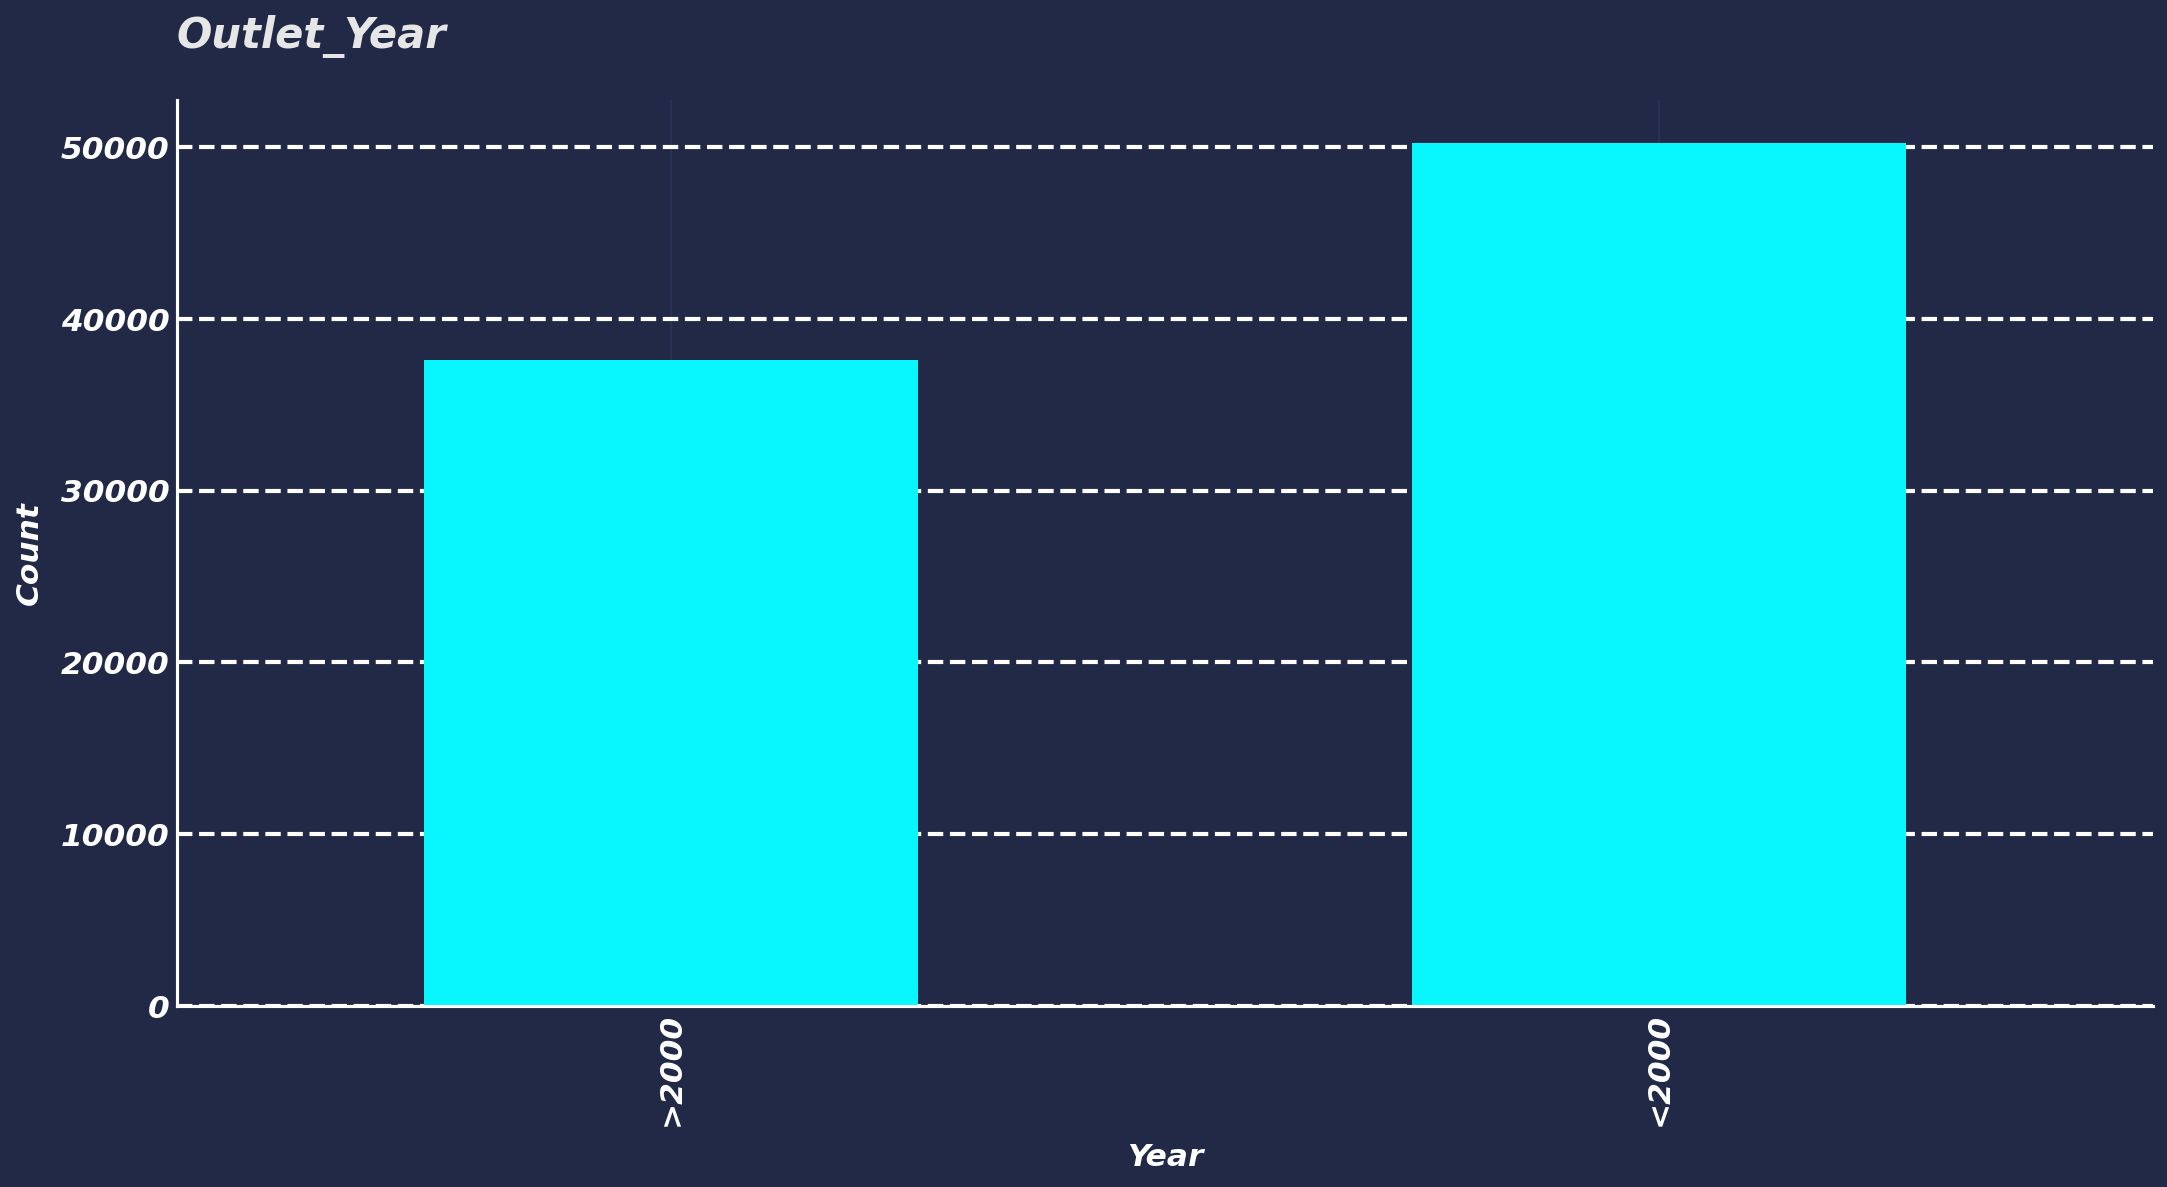

In [52]:
# plot Outlet Year

bins_year.value_counts().sort_values().plot(kind="bar", figsize=(17, 8)) 
plt.grid(axis="y", linewidth=2, linestyle="--", color="white") 

plt.title("Outlet_Year")
plt.xlabel("Year")
plt.ylabel("Count")

In [53]:
#  outlet year setelah binning
# rata² Sales dari Outlet year

train.groupby(bins_year)["Sales"].mean().to_frame().sort_values("Sales",ascending=False).style.bar(subset="Sales", color="red") 

In [33]:
for i in [train,test]:
    i["year_bins"] = i.Outlet_Year.apply(lambda x: ">2000" if x > 2000 else "<2000") 

## Multivariat analysis & Feature Engineering

In [34]:
train.head()

Item_ID     Item_W  ...  ID  year_bins
0   FDU32  21.027499  ...  32      >2000
1   NCT54  21.102371  ...  54      <2000
2   FDW08  20.882263  ...   8      <2000
3   FDJ22  21.050435  ...  22      <2000
4   FDF47  21.247876  ...  47      <2000

[5 rows x 12 columns]

Text(0.5, 1.1, 'Year bins di outlet size berdasarkan location type')

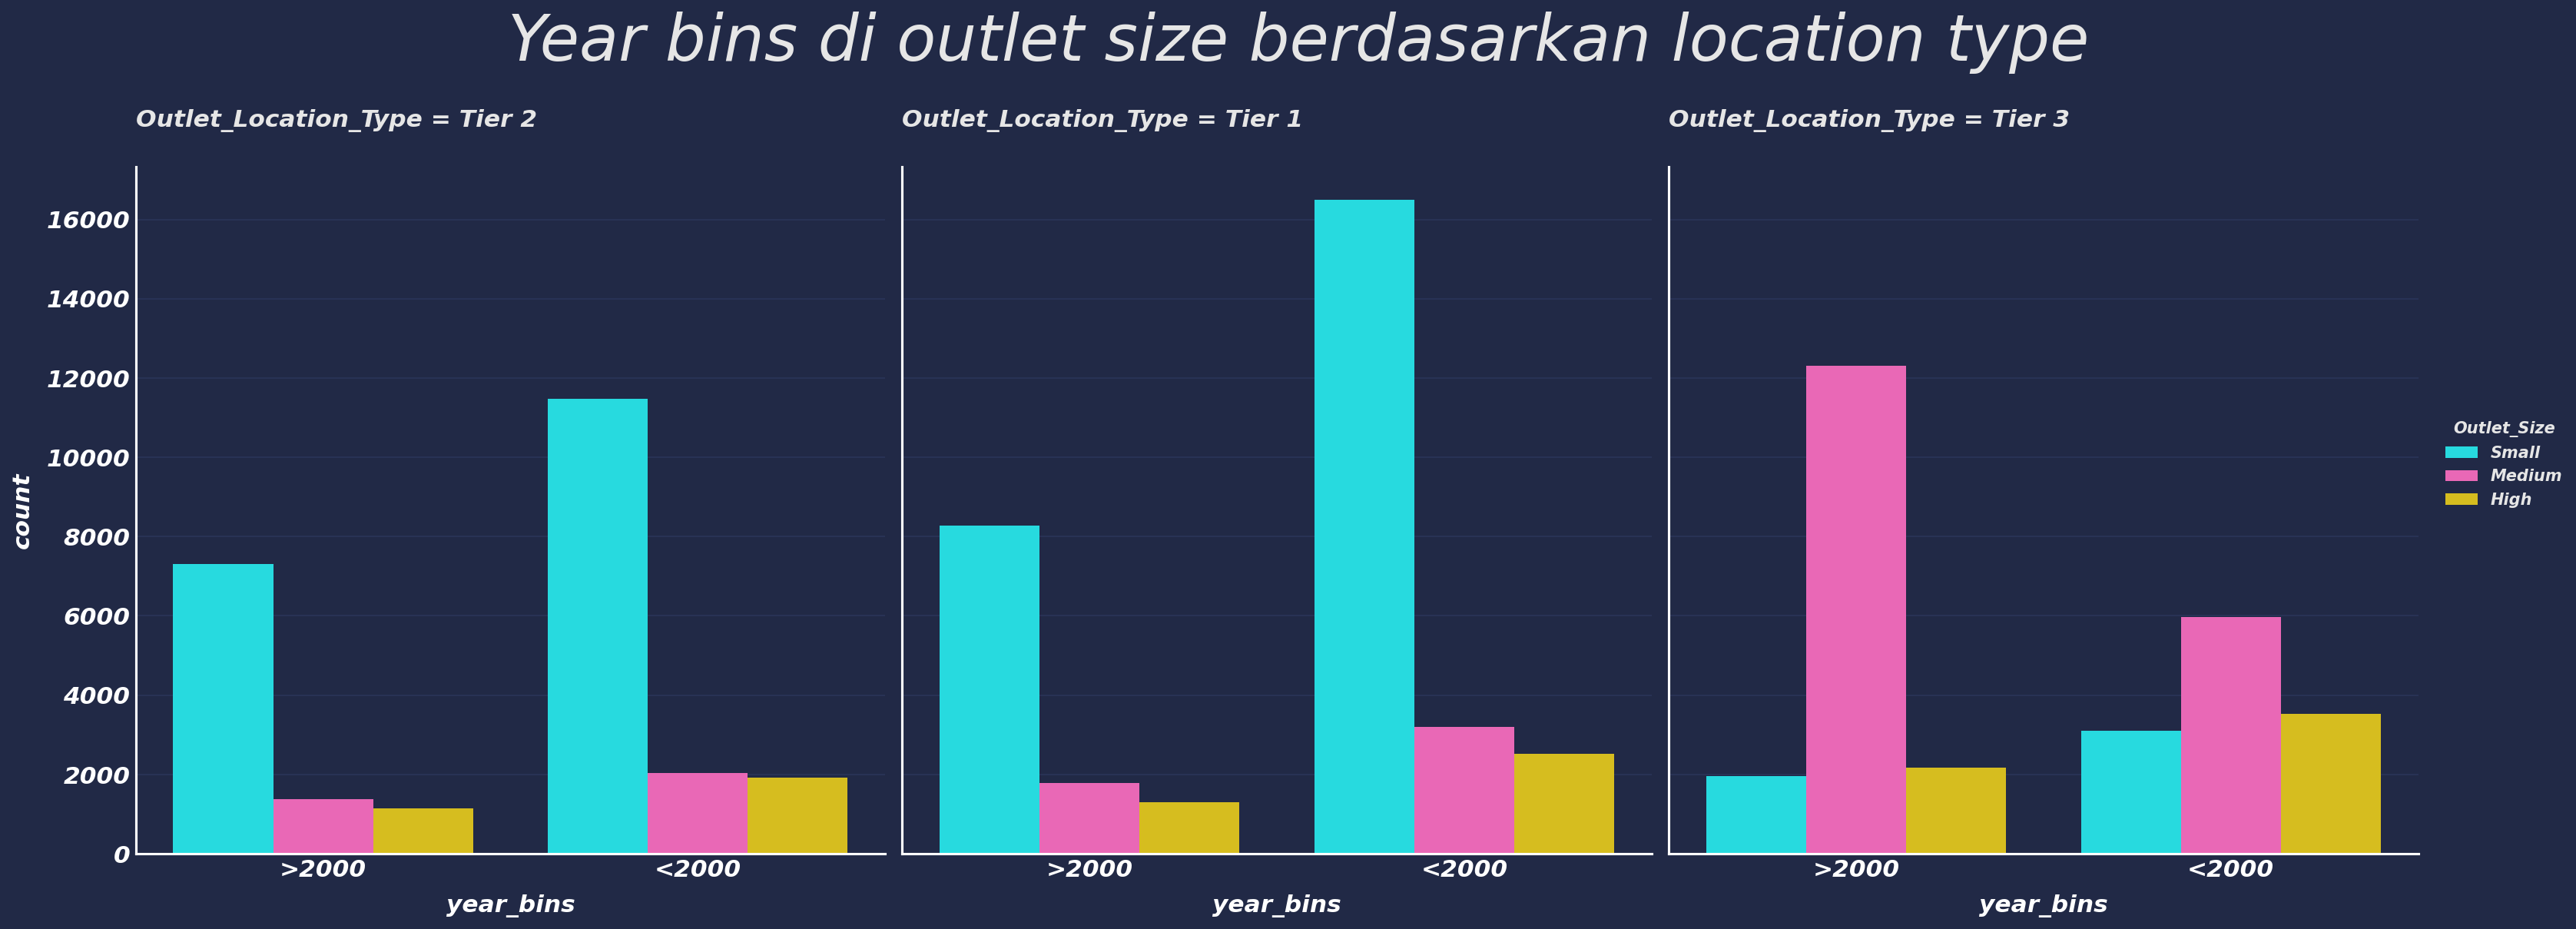

In [47]:
sns.catplot(x="year_bins",hue="Outlet_Size",col= "Outlet_Location_Type", data=train, height=7, ci=None, kind="count")
plt.suptitle("Year bins di outlet size berdasarkan location type", y=1.1, size=40) 

Text(0.5, 1.1, 'Year bins di outlet size berdasarkan location type dan Sales')

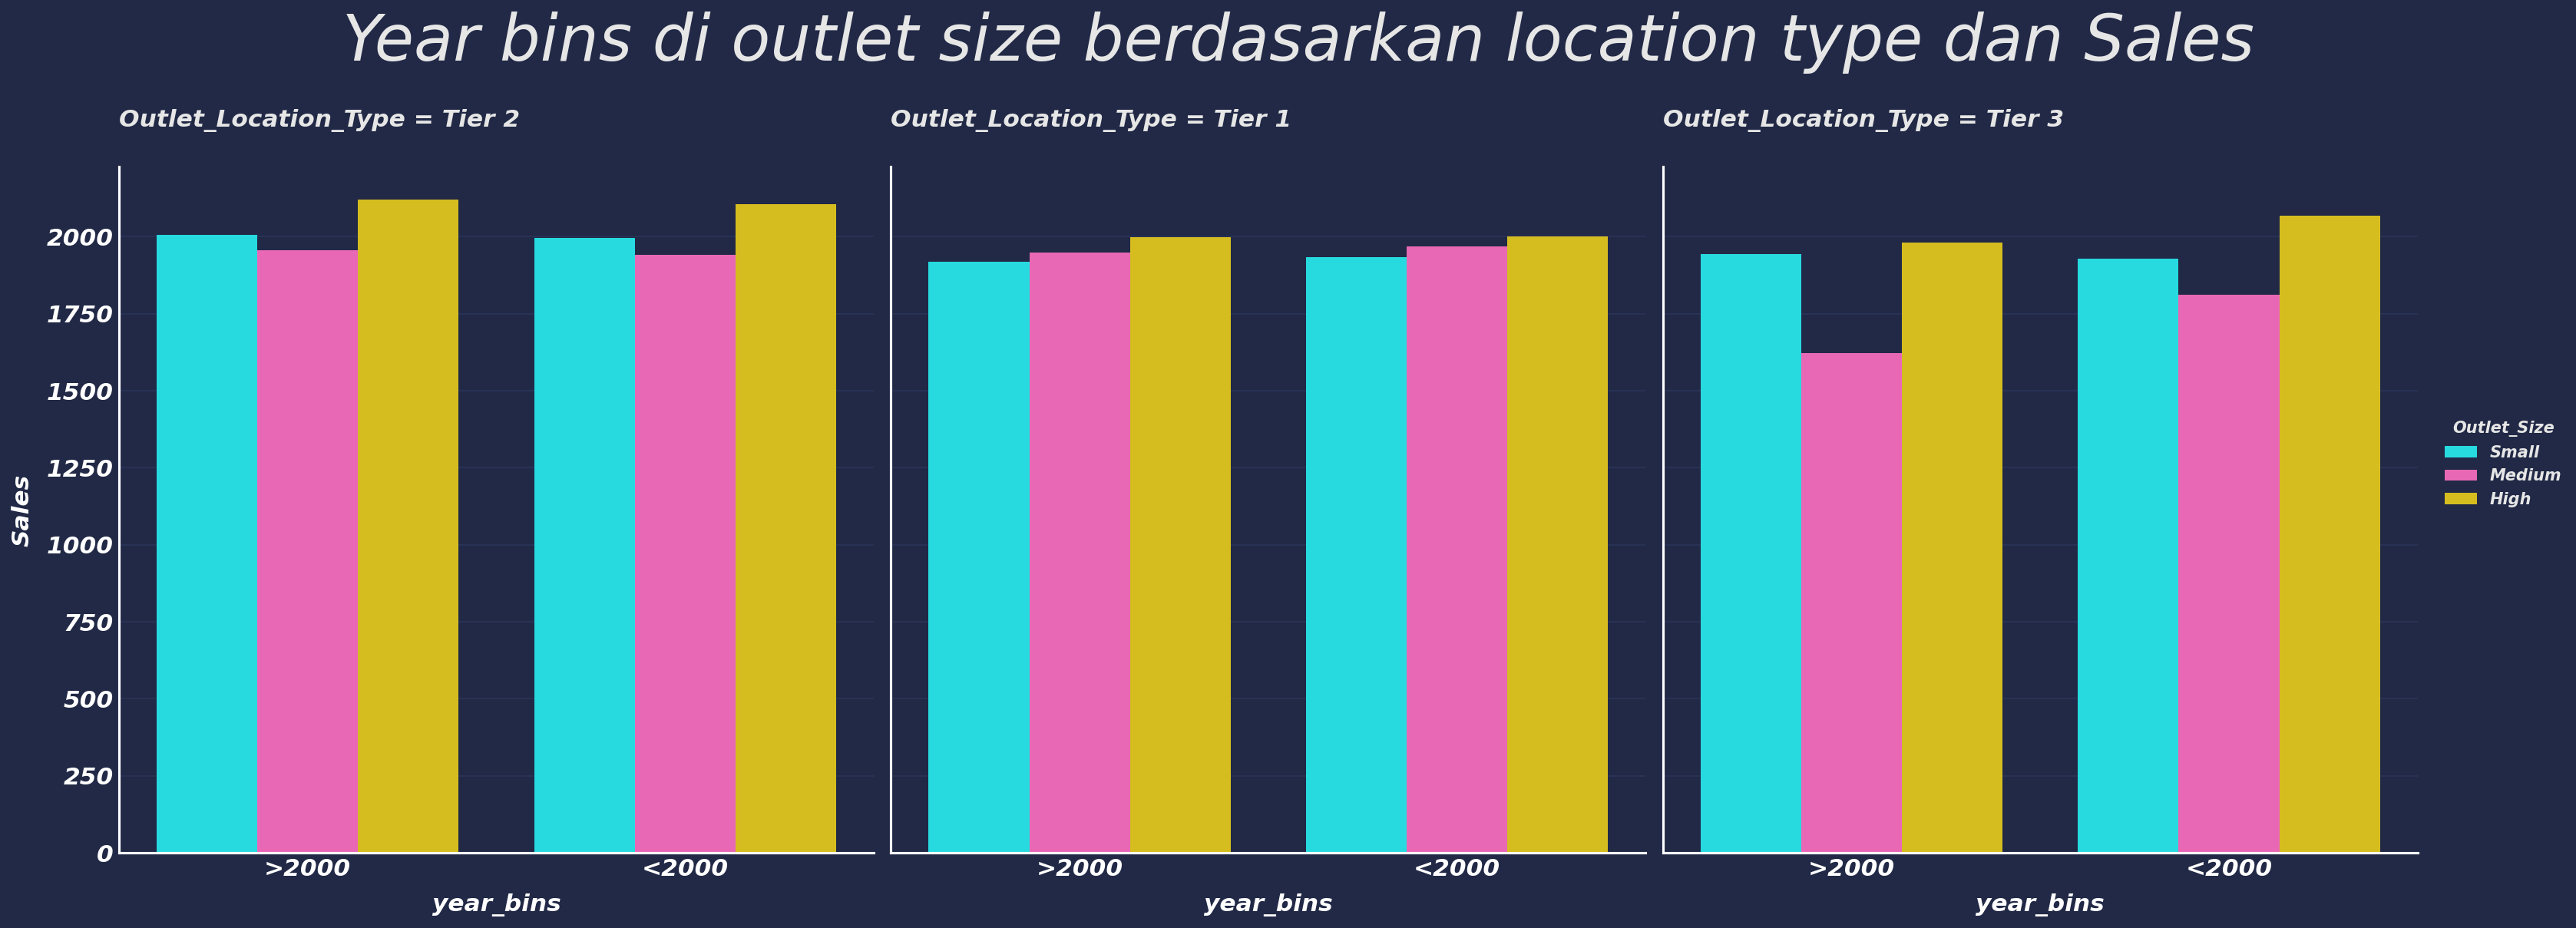

In [49]:
sns.catplot(x="year_bins",y = "Sales",hue="Outlet_Size",col= "Outlet_Location_Type", data=train, height=7, ci=None, kind="bar")
plt.suptitle("Year bins di outlet size berdasarkan location type dan Sales", y=1.1, size=40) 

In [52]:
ittrain.groupby(["year_bins","Outlet_Size"])["Sales"].mean().to_frame().style.bar(subset="Sales", color="red") 

Text(0.0, 1.0, 'Sales berdasarkan year vs outlet size')

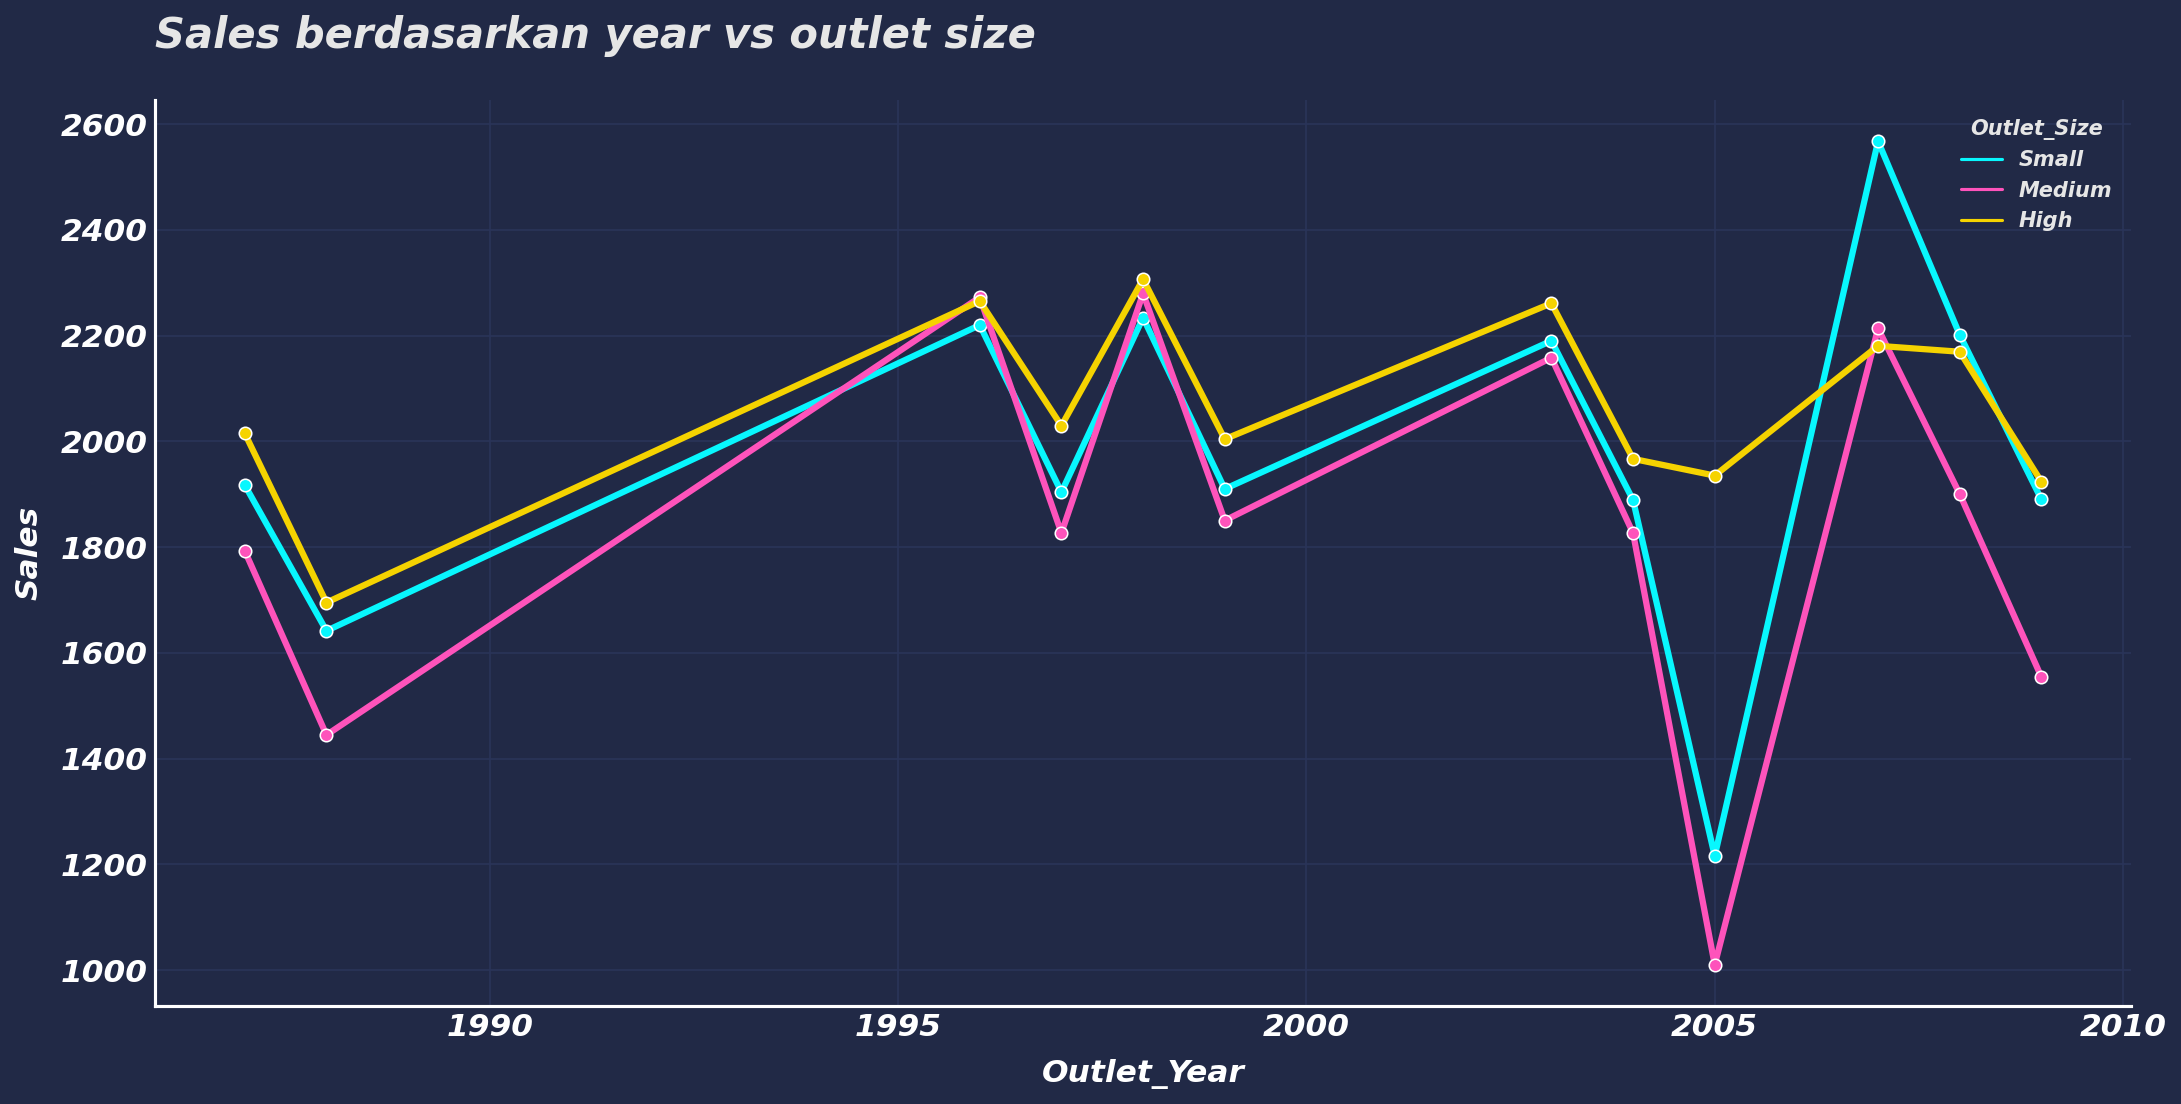

In [59]:
plt.figure(figsize=(17,8))
sns.lineplot(x=train.Outlet_Year,y=train.Sales,hue=train.Outlet_Size,marker="o",linewidth=3,ci=None)
plt.title("Sales berdasarkan year vs outlet size") 


In [67]:
train.groupby(["Outlet_ID","Outlet_Size"])["Sales"].mean().to_frame().style.bar(subset=["Sales"], color="red") 

In [71]:
train.groupby("Item_Type")["Item_W"].mean().to_frame().style.bar(subset="Item_W",color="red")

In [83]:
train.head()

Item_ID     Item_W  ...        new7        new8
0   FDU32  21.027499  ...  107.615406  164.948186
1   NCT54  21.102371  ...  132.130501  174.572421
2   FDW08  20.882263  ...  205.465010  205.465010
3   FDJ22  21.050435  ...  116.385376  135.846100
4   FDF47  21.247876  ...  137.806524  149.306296

[5 rows x 20 columns]

In [81]:
for i in [train, test]: 
    i["new1"] = i.groupby(["Outlet_Location_Type","Outlet_Size","Item_ID", "Item_Type"])["Item_W"].transform("mean") 
    i["new2"] = i.groupby(["Outlet_Location_Type","Outlet_Size","Item_ID", "Item_Type"])["Item_W"].transform("max") 
    i["new3"] = i.groupby(["Outlet_Location_Type","Outlet_Size","Item_ID", "Item_Type"])["Item_W"].transform("min") 
    i["new4"] = i.groupby(["Outlet_Location_Type","Outlet_Size","Item_ID", "Item_Type"])["Item_W"].transform("median") 
    
    

In [82]:
for i in [train, test]: 
    i["new5"] = i.groupby(["Outlet_Location_Type","Outlet_Size","Item_ID", "Item_Type"])["Item_MRP"].transform("mean") 
    i["new6"] = i.groupby(["Outlet_Location_Type","Outlet_Size","Item_ID", "Item_Type"])["Item_MRP"].transform("max") 
    i["new7"] = i.groupby(["Outlet_Location_Type","Outlet_Size","Item_ID", "Item_Type"])["Item_MRP"].transform("min") 
    i["new8"] = i.groupby(["Outlet_Location_Type","Outlet_Size","Item_ID", "Item_Type"])["Item_MRP"].transform("median") 
    
    

In [84]:
# drop a useless column
col = ["Item_ID","Item_W","Item_MRP", "Outlet_Year"]

for i in [train, test]: 
    i.drop(col, axis = 1,inplace=True) 

In [85]:
train.head()

Item_Type Outlet_ID  ...        new7        new8
0  Baking Goods    OUT046  ...  107.615406  164.948186
1          Meat    OUT035  ...  132.130501  174.572421
2        Drinks    OUT035  ...  205.465010  205.465010
3         Foods    OUT046  ...  116.385376  135.846100
4  Baking Goods    OUT035  ...  137.806524  149.306296

[5 rows x 16 columns]

In [86]:
print(train.shape)
print(test.shape)
print("")
print(train.duplicated().sum()) 
print("") 
print(train.isnull().any().sum())
print(test.isnull().any().sum())  

(87864, 16)
(37656, 15)

0

0
0


In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87864 entries, 0 to 87863
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Type             87864 non-null  object 
 1   Outlet_ID             87864 non-null  object 
 2   Outlet_Size           87864 non-null  object 
 3   Outlet_Location_Type  87864 non-null  object 
 4   Sales                 87864 non-null  float64
 5   Item                  87864 non-null  object 
 6   ID                    87864 non-null  int32  
 7   year_bins             87864 non-null  object 
 8   new1                  87864 non-null  float64
 9   new2                  87864 non-null  float64
 10  new3                  87864 non-null  float64
 11  new4                  87864 non-null  float64
 12  new5                  87864 non-null  float64
 13  new6                  87864 non-null  float64
 14  new7                  87864 non-null  float64
 15  new8               

In [88]:
# make a new file 

train.to_csv("train_Sales(clean).csv", index=False) 
test.to_csv("test._Sales(clean).csv", index=False) 